
## Time Series GPTs

* Time series data 



## Libraries


In [1]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures
## !pip install numba
## !pip install cudatoolkit
## !pip install mlxtend


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
## torch.set_float32_matmul_precision('medium')
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures
from sdtw_cuda_loss import SoftDTW
from mlxtend.plotting import heatmap
import mlxtend

from torch.optim.lr_scheduler import LambdaLR


In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Step 1 - Data Wrangling


In [5]:

tsDataWrangling_obj.step1_wrangle()

tsDataWrangling_obj.FOUR_files_merged_data_rc


0
50000
100000
150000
200000
250000


Timestamp_f1      MM_Timestamp_f1  THEORETICAL_TONNAGE_f3  \
0       2021-08-01 01:23:00  2021-08-01 00:00:00                    6006   
1       2021-08-01 01:23:00  2021-08-01 00:01:00                    6006   
2       2021-08-01 01:23:00  2021-08-01 00:02:00                    6006   
3       2021-08-01 01:23:00  2021-08-01 00:03:00                    6006   
4       2021-08-01 01:23:00  2021-08-01 00:04:00                    6006   
...                     ...                  ...                     ...   
266211  2022-01-31 22:16:00  2022-01-31 22:12:00                    6322   
266212  2022-01-31 22:16:00  2022-01-31 22:13:00                    6322   
266213  2022-01-31 22:16:00  2022-01-31 22:14:00                    6322   
266214  2022-01-31 22:16:00  2022-01-31 22:15:00                    6322   
266215  2022-01-31 22:16:00  2022-01-31 22:16:00                    6322   

        Coke_Rate_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                992          1999.604384   179.749638   
1                992          2000.288837   179.765945   
2                992          1999.242862   179.782251   
3                992          1999.884442   179.798490   
4                992          1999.849729   179.784430   
...              ...                  ...          ...   
266211           924          2167.603916   189.029098   
266212           924          2167.404841   188.892415   
266213           924          2167.205766   188.689857   
266214           924          2167.006691   188.610793   
266215           924          2166.807617   188.621779   

        SNORT_VALVE_POSITION_f3  COLD_BLAST_MOISTURE_f3  \
0                     98.334297                4.997585   
1                     98.334297                5.000531   
2                     98.334297                5.003476   
3                     98.334297                5.006422   
4                     98.334297                5.009368   
...                         ...                     ...   
266211                98.334297                1.151288   
266212                98.334297                1.151910   
266213                98.334297                1.152533   
266214                98.334297                1.153156   
266215                98.334297                1.153779   

        HOST_BLAST_MOISTURE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0                     8.084517               2.510680           0.0   
1                     8.079545               2.489381           0.0   
2                     8.074573               2.489037           0.0   
3                     8.069602               2.496867           0.0   
4                     8.064630               2.501961           0.0   
...                        ...                    ...           ...   
266211                5.105940               0.000000           0.0   
266212                5.110442               0.000000           0.0   
266213                5.114944               0.000000           0.0   
266214                5.119446               0.000000           0.0   
266215                5.123948               0.000000           0.0   

        NAT_GAS _INJECTION_f3  HOT_BLAST_PRESSURE_f3  TOP_PRESS_f3  \
0                 4034.234339              34.357590     17.398326   
1                 4024.947376              34.328821     17.483486   
2                 4011.601682              34.300052     17.260358   
3                 4012.024633              34.271282     17.212606   
4                 4000.467204              34.242513     17.405035   
...                       ...                    ...           ...   
266211           10497.271240              35.644868     18.695292   
266212           10524.821170              35.648894     17.985995   
266213           10520.260680              35.635697     18.707857   
266214           10518.901880              35.621174     18.198216   
266215           10612.610090              35.602023     18.338861   

  


## Step 2 - Data Wrangling


In [6]:

tsDataWrangling_obj.step2_wrangle()


In [7]:

tsDataWrangling_obj.df_res_shifted 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
1     0.719500                4.242439          2161.425209   
2     0.710486                4.174343          2168.238915   
3     0.666106                4.126144          2167.779119   
4     0.675145                4.120736          2166.974740   
5     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1390  0.762500                4.204430          2169.361647   
1391  0.646000                4.208539          2169.079601   
1392  0.654667                4.212648          2168.797556   
1393  0.591667                4.217784          2168.444999   
1394  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
1               9306.840913   184.818611                    0.0           0.0   
2               9336.364456   185.993447                    0.0           0.0   
3               9419.200115   185.828474                    0.0           0.0   
4               9564.165802   185.924481                    0.0           0.0   
5               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1390            9297.484543   185.046491                    0.0           0.0   
1391            9312.779010   185.053796                    0.0           0.0   
1392            9303.753420   185.007919                    0.0           0.0   
1393            9333.448101   184.942435                    0.0           0.0   
1394            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  date_f1    CNUM     LNUM_f1  \
1              0.354        0.16  44562.0     2.0  168.666667   
2              0.313        0.83  44562.0     6.0  137.450000   
3              0.360        0.10  44562.0     7.0  156.684211   
4              0.319        0.34  44562.0     8.0  150.869919   
5              0.335        0.28  44562.0     9.0  160.218182   
...              ...         ...      ...     ...         ...   
1390           0.343        0.30  44561.0  4344.0  147.500000   
1391           0.324        0.30  44561.0  4345.0  147.500000   
1392           0.325        0.16  44561.0  4346.0  174.000000   
1393           0.335        0.26  44561.0  4347.0  160.000000   
1394           0.328        1.08  44561.0  4348.0  149.333333   

      Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
1               21.080431             18.313322             4.131228   
2               20.996415             18.311768             4.133911   
3               20.749627             18.341701             4.137632   
4               20.609259             18.644476             4.142824   
5               20.617383             18.845791             4.220690   
...                   ...                   ...                  ...   
1390            21.039583             18.308225             4.129485   
1391            21.043999             18.308776             4.129674   
1392            21.048415             18.309327             4.129862   
1393            21.053935             18.310016             4.130097   
1394            21.060559             18.310842             4.130380   

      Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
1               54.940123    171.769513    182.533770    148.126483   
2               55.072779    170.595469    183.725050    148.161842   
3               55.375043    167.017421    195.812061    147.562523   
4               55.341884    154.214917    188.028883    147.807509   
5               55.284451    156.234542    200.141261    149.014319   
...                   ...           ...           ...           ...   
1390            55.162782    167.619915    185.900341    148.103530   
1391            55.162767    164.706552    182.408576    148.1060

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 1 to 1394
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1394 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 3   NAT_GAS _INJECTION_f3    1394 non-null   float64
 4   WINDRATE_f3              1394 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 6   COAL_FLOW_f3             1394 non-null   float64
 7   Cast_Avg_Mn_f2           1394 non-null   float64
 8   Slag_Fe_f2               1394 non-null   float64
 9   date_f1                  1394 non-null   float64
 10  CNUM                     1394 non-null   float64
 11  LNUM_f1                  1394 non-null   float64
 12  Selec_Top_Gas_CO_f3      1394 non-null   float64
 13  Selec_Top_Gas_CO2_f3     1394 non-null   float64
 14  Selec_Top_Gas_H2_f3     

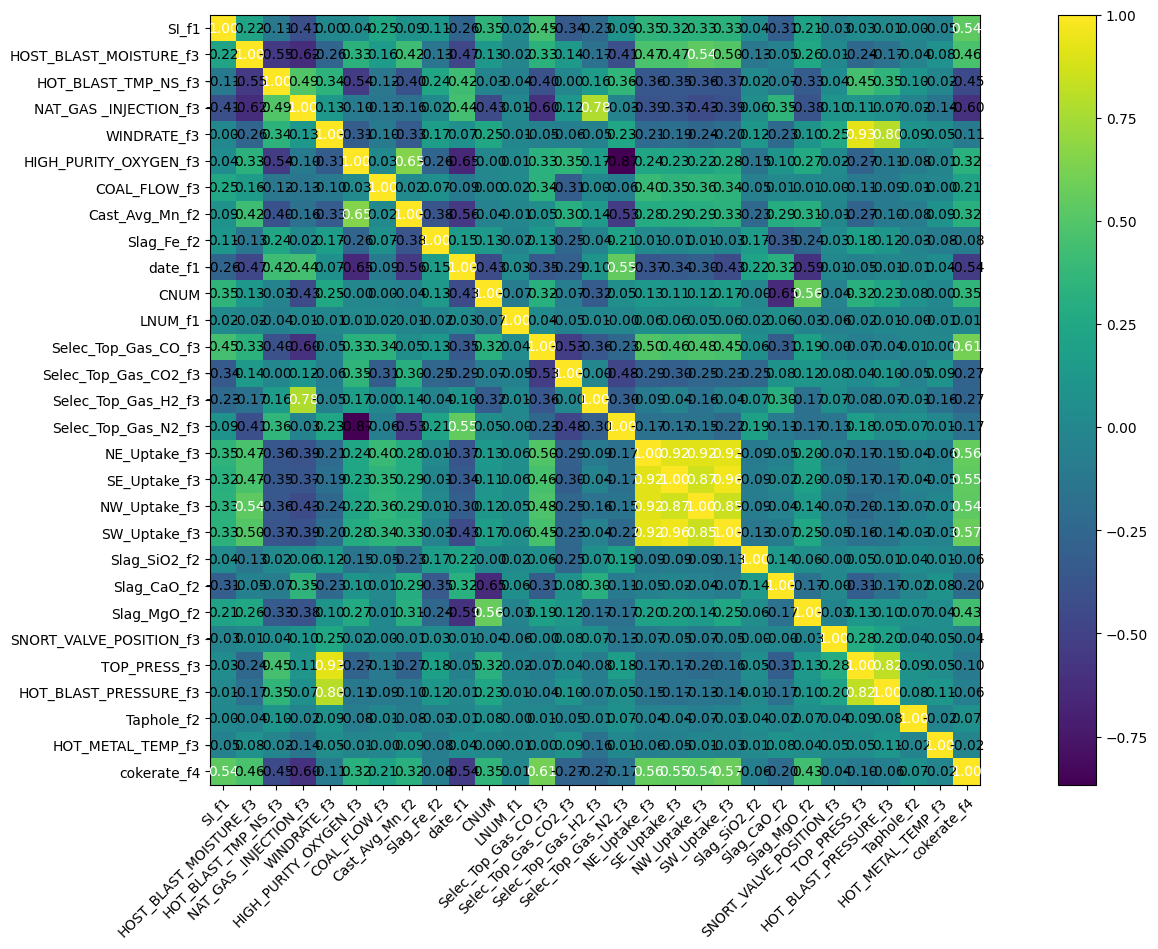

In [8]:

tsDataWrangling_obj.step2_simpler_plot_correlation_matrix(  tsDataWrangling_obj.df_res_shifted    )


In [9]:

tsDataWrangling_obj.dates_df_res_shifted


SI_f1             Date_Map  HOST_BLAST_MOISTURE_f3  \
1     0.719500  2022-01-01 00:45:00                4.242439   
2     0.710486  2022-01-01 08:43:00                4.174343   
3     0.666106  2022-01-01 10:17:00                4.126144   
4     0.675145  2022-01-01 12:40:00                4.120736   
5     0.776831  2022-01-01 15:06:00                4.120331   
...        ...                  ...                     ...   
1390  0.762500  2021-12-31 13:10:00                4.204430   
1391  0.646000  2021-12-31 14:41:00                4.208539   
1392  0.654667  2021-12-31 16:15:00                4.212648   
1393  0.591667  2021-12-31 17:40:00                4.217784   
1394  0.724667  2021-12-31 19:31:00                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
1             2161.425209            9306.840913   184.818611   
2             2168.238915            9336.364456   185.993447   
3             2167.779119            9419.200115   185.828474   
4             2166.974740            9564.165802   185.924481   
5             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1390          2169.361647            9297.484543   185.046491   
1391          2169.079601            9312.779010   185.053796   
1392          2168.797556            9303.753420   185.007919   
1393          2168.444999            9333.448101   184.942435   
1394          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  \
1                       0.0           0.0           0.354        0.16   
2                       0.0           0.0           0.313        0.83   
3                       0.0           0.0           0.360        0.10   
4                       0.0           0.0           0.319        0.34   
5                       0.0           0.0           0.335        0.28   
...                     ...           ...             ...         ...   
1390                    0.0           0.0           0.343        0.30   
1391                    0.0           0.0           0.324        0.30   
1392                    0.0           0.0           0.325        0.16   
1393                    0.0           0.0           0.335        0.26   
1394                    0.0           0.0           0.328        1.08   

      date_f1    CNUM     LNUM_f1  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
1     44562.0     2.0  168.666667            21.080431             18.313322   
2     44562.0     6.0  137.450000            20.996415             18.311768   
3     44562.0     7.0  156.684211            20.749627             18.341701   
4     44562.0     8.0  150.869919            20.609259             18.644476   
5     44562.0     9.0  160.218182            20.617383             18.845791   
...       ...     ...         ...                  ...                   ...   
1390  44561.0  4344.0  147.500000            21.039583             18.308225   
1391  44561.0  4345.0  147.500000            21.043999             18.308776   
1392  44561.0  4346.0  174.000000            21.048415             18.309327   
1393  44561.0  4347.0  160.000000            21.053935             18.310016   
1394  44561.0  4348.0  149.333333            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
1                4.131228            54.940123    171.769513    182.533770   
2                4.133911            55.072779    170.595469    183.725050   
3                4.137632            55.375043    167.017421    195.812061   
4                4.142824            55.341884    154.214917    188.028883   
5                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1390             4.129485            55.162782    167.619915    185.900341   
1391     


## Step 3 - Data Wrangling


In [10]:

tsDataWrangling_obj.step3_wrangle()


In [11]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [12]:

tsDataWrangling_obj.delta_for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [13]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS.drop(  ['Date_Map'], axis=1 ) 


In [14]:

tsDataWrangling_obj.for_RNN_data_CIVS


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0     0.000000    0.000000  0.719500                4.242439   
1     0.000000    0.000000  0.710486                4.174343   
2    -0.044380    0.000000  0.666106                4.126144   
3     0.009040    0.000000  0.675145                4.120736   
4     0.101686    0.000000  0.776831                4.120331   
...        ...         ...       ...                     ...   
1389  0.109500    0.004444  0.762500                4.204430   
1390 -0.116500    0.008900  0.646000                4.208539   
1391  0.008667   -0.037618  0.654667                4.212648   
1392 -0.063000   -0.014340  0.591667                4.217784   
1393  0.133000    0.011422  0.724667                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0             2161.425209            9306.840913   184.818611   
1             2168.238915            9336.364456   185.993447   
2             2167.779119            9419.200115   185.828474   
3             2166.974740            9564.165802   185.924481   
4             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1389          2169.361647            9297.484543   185.046491   
1390          2169.079601            9312.779010   185.053796   
1391          2168.797556            9303.753420   185.007919   
1392          2168.444999            9333.448101   184.942435   
1393          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  COAL_FLOW_f3  \
0                       0.0    0   45     0    1      1  2022           0.0   
1                       0.0    0   43     8    1      1  2022           0.0   
2                       0.0    0   17    10    1      1  2022           0.0   
3                       0.0    0   40    12    1      1  2022           0.0   
4                       0.0    0    6    15    1      1  2022           0.0   
...                     ...  ...  ...   ...  ...    ...   ...           ...   
1389                    0.0    0   10    13   31     12  2021           0.0   
1390                    0.0    0   41    14   31     12  2021           0.0   
1391                    0.0    0   15    16   31     12  2021           0.0   
1392                    0.0    0   40    17   31     12  2021           0.0   
1393                    0.0    0   31    19   31     12  2021           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.354        0.16     2.0            21.080431   
1              0.313        0.83     6.0            20.996415   
2              0.360        0.10     7.0            20.749627   
3              0.319        0.34     8.0            20.609259   
4              0.335        0.28     9.0            20.617383   
...              ...         ...     ...                  ...   
1389           0.343        0.30  4344.0            21.039583   
1390           0.324        0.30  4345.0            21.043999   
1391           0.325        0.16  4346.0            21.048415   
1392           0.335        0.26  4347.0            21.053935   
1393           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                  ...                  ...   
1389             18.308225             4.129485            55.162782   
1390             18.308776             4.129674            55.162767   
1391             18.309327             4.129862            55.140373   
1392  


## Correlation Matrix


In [15]:

def simple_plot_correlation_matrix( res ):
        print(  res.info()  )
        print(  res.shape   )
        headers_list = ['delta_SI', 'mov_avg_SI', 'SI_f1', 'HOST_BLAST_MOISTURE_f3', 'HOT_BLAST_TMP_NS_f3', 
                        'NAT_GAS _INJECTION_f3', 'WINDRATE_f3', 'HIGH_PURITY_OXYGEN_f3',  
                        'month', 'COAL_FLOW_f3', 'Cast_Avg_Mn_f2', 'Slag_Fe_f2', 
                        'CNUM', 'Selec_Top_Gas_CO_f3', 'Selec_Top_Gas_CO2_f3', 'Selec_Top_Gas_H2_f3', 
                        'Selec_Top_Gas_N2_f3', 'NE_Uptake_f3', 'SE_Uptake_f3', 'NW_Uptake_f3', 'SW_Uptake_f3', 
                        'Slag_SiO2_f2', 'Slag_CaO_f2', 'Slag_MgO_f2', 'SNORT_VALVE_POSITION_f3', 'TOP_PRESS_f3', 
                        'HOT_BLAST_PRESSURE_f3', 'Taphole_f2', 'HOT_METAL_TEMP_f3', 'cokerate_f4']
        ## headers_list = res.columns.values.tolist()
        print(  headers_list  )
        cm = np.corrcoef(  res[ headers_list ].values.T  )
        hm = heatmap(cm, row_names= headers_list, column_names=headers_list, figsize=[20,10])
        plt.show()


In [16]:

'''

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.simulate_better_dataset_more(  
                     tsDataWrangling_obj.for_RNN_data_CIVS    
)


'''


'\n\ntsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.simulate_better_dataset_more(  \n                     tsDataWrangling_obj.for_RNN_data_CIVS    \n)\n\n\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   delta_SI                 1394 non-null   float64
 1   mov_avg_SI               1394 non-null   float64
 2   SI_f1                    1394 non-null   float64
 3   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 4   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 5   NAT_GAS _INJECTION_f3    1394 non-null   float64
 6   WINDRATE_f3              1394 non-null   float64
 7   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 8   sec                      1394 non-null   int64  
 9   min                      1394 non-null   int64  
 10  hour                     1394 non-null   int64  
 11  day                      1394 non-null   int64  
 12  month                    1394 non-null   int64  
 13  year                     1394 non-null   int64  
 14  COAL_FLOW_f3            

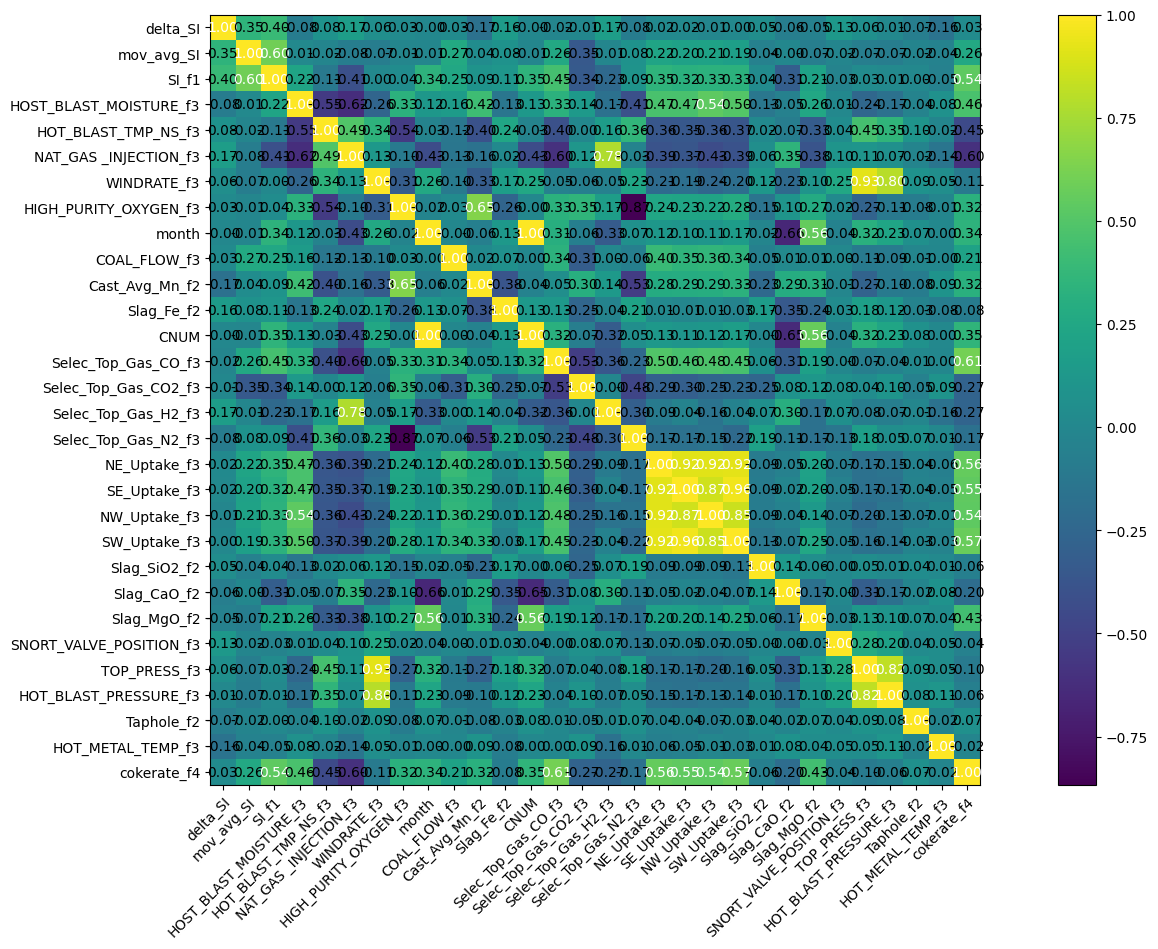

In [17]:


simple_plot_correlation_matrix( tsDataWrangling_obj.for_RNN_data_CIVS   )




## Pass Wrangled data to GPT experimenter


In [18]:

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n          = int(   tsGPT_obj.for_RNN_data_CIVS.shape[0]    )
print(     tsGPT_obj.length_n     )


1394



## Training Functions


In [19]:

def custom_loss_ratio(pred, real, mse_weight=0.8, log_ratio_weight=0.2):
    eps = 1e-6
    safe_ratio = torch.clamp(torch.abs((pred + eps) / (real + eps)), min=0.1, max=10.0)
    log_ratio = torch.log(safe_ratio + eps)
    ratio_loss = torch.mean(log_ratio ** 2)
    mse_loss = F.mse_loss(pred, real)
    return mse_weight * mse_loss + log_ratio_weight * ratio_loss



In [20]:

import torch

def log_cosh_loss(pred, target):
    """
    Computes the log-cosh loss between predictions and targets.
    This is smoother than MSE and less sensitive to outliers.

    Args:
        pred (Tensor): Predicted values (e.g., pred_si)
        target (Tensor): Ground truth values (e.g., y_si)

    Returns:
        Tensor: Scalar loss
    """
    return torch.mean(torch.log(torch.cosh(pred - target + 1e-6)))



In [21]:

def custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25, clip_low=0.5, clip_high=2.0):
    """
    Parameters:
    - loss_SI: torch.Tensor (scalar) — Loss on the silicon prediction
    - loss_all: torch.Tensor (scalar) — Loss on the full feature vector
    - beta: float — weight for ratio regularization
    - desired_ratio: float — the target ratio of SI loss to total loss
    - clip_low, clip_high: float — clipping bounds for the loss ratio (like PPO)

    Returns:
    - loss_total: torch.Tensor (scalar)
    """

    # Compute the raw ratio
    raw_ratio = loss_SI / (loss_all.detach() + 1e-8)

    # Clip the ratio like PPO to prevent extreme swings
    clipped_ratio = torch.clamp(raw_ratio, clip_low, clip_high)

    # Use clipped ratio to weight the loss dynamically
    weighted_SI = clipped_ratio * loss_SI
    weighted_all = (1 - clipped_ratio) * loss_all

    # Main loss component (adaptive weighting)
    loss_main = weighted_SI + weighted_all

    # Regularization to encourage a specific SI/total ratio (stabilizes dynamics)
    loss_total_for_ratio = loss_SI + loss_all + 1e-8
    actual_ratio = loss_SI / loss_total_for_ratio
    ratio_reg = (actual_ratio - desired_ratio).pow(2)

    # Combine total loss
    loss_total = loss_main + beta * ratio_reg

    return loss_total



In [22]:


def function_train_rc(train_CIVS_2, reasoning_steps=1, backprop_through_steps=False):
    
    
    model     = Time_Series_GPT.Time_Series_GPT(tsGPT_obj).to(tsGPT_obj.device)
    optimizer = torch.optim.Adam(model.parameters(), lr=tsGPT_obj.learning_rate, weight_decay=1e-4)

    criterion = nn.MSELoss()

    history = {
        'loss': [], 'test_loss': [],
        'loss_A': [], 'loss_B': [], 'loss_C': [],
        'loss_SIM0': [], 'loss_SIM1': [], 'loss_SIM2': [],
        'loss_SIM3': [], 'loss_SIM4': [], 'loss_SIM5': []
    }

 
    train_CIVS_tr, x_means, x_standard_devs = tsGPT_obj.standardize_x_scales(train_CIVS_2)
    train_CIVS_tr_scaled                    = (train_CIVS_tr - x_means) / x_standard_devs

    model.train()
    
    for batch_i, epoch in enumerate(range(tsGPT_obj.max_iters)):
        
        xb, yb = tsGPT_obj.get_batch( train_CIVS_tr_scaled )  # shapes: [B, T, F]
        
        
        if model.training:
            noise = 0.01 * torch.randn_like(xb)
            xb    = xb + noise.clamp(-0.05, 0.05)

        
        idx_pred, pred_si = model(
            xb, 
            targets=None, 
            reasoning_steps=reasoning_steps,
            backprop_through_steps=backprop_through_steps,
            return_si=True  
        )  
        
        ## [B, 10, 35],  [B, 10, 1]
        ## idx_pred,     pred_si 
        
       
        B, T, E = xb.shape
        
        pred_si = pred_si.squeeze(2)
        
        
        ###################################################################################
        
        loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)    ## all 10 of 10
        
        y_si        =  yb[:, :, 2]     ## [B, 10, 1]
        
        ###################################################################################
        
        ## print(pred_si.shape)
        ## print(y_si.shape)
        
        ## pred_si = pred_si[:, :3]
        ## y_si    =    y_si[:, :3]
        
        loss_mse     = F.mse_loss(    pred_si, y_si)
        loss_cosh    = log_cosh_loss( pred_si, y_si)
        loss_SI_main = 0.5 * loss_mse + 0.5 * loss_cosh
        loss_SI      = loss_SI_main
        
        ###################################################################################
        
        alpha = 0.7
        
        loss_total = alpha * loss_SI + (1 - alpha) * loss_all
        
        ###################################################################################
        
        optimizer.zero_grad(set_to_none=True)
        loss_total.backward()
        optimizer.step()
         

        # === Logging ===
        history['loss'].append(loss_total.item())
        history['loss_A'].append(loss_SI.item())
        history['loss_B'].append(loss_all.item())
        history['loss_C'].append(0)

        # Placeholders if Curve_SIMs aren't defined
        history['loss_SIM0'].append(0)
        history['loss_SIM1'].append(0)
        

        # === Debug Print ===
        if batch_i % 200 == 0:
            print(f"[{batch_i}] Train Loss: {loss_total.item():.6f}")
            print("Loss_SI:", loss_SI.item(), "Loss_all:", loss_all.item())
            ## print("Prediction shape:", pred.shape)
            print("===")

    tsGPT_obj.plot_losses_training(history)
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled






## Train on Train, Test on Test



## Run 1


In [23]:

all_real_si_300to400 = []
all_pred_si_300to400 = []

all_real_si_200to400 = []
all_pred_si_200to400 = []

all_real_si_100to400 = []
all_pred_si_100to400 = []

all_real_si_000to400 = []
all_pred_si_000to400 = []


In [24]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.784519
Loss_SI: 0.6142309904098511 Loss_all: 1.1818572282791138
===
[200] Train Loss: 0.099951
Loss_SI: 0.0438801646232605 Loss_all: 0.23078382015228271
===
[400] Train Loss: 0.045677
Loss_SI: 0.02476104348897934 Loss_all: 0.09448220580816269
===
[600] Train Loss: 0.024577
Loss_SI: 0.012970004230737686 Loss_all: 0.051659099757671356
===
[800] Train Loss: 0.019347
Loss_SI: 0.009711460210382938 Loss_all: 0.04183050990104675
===


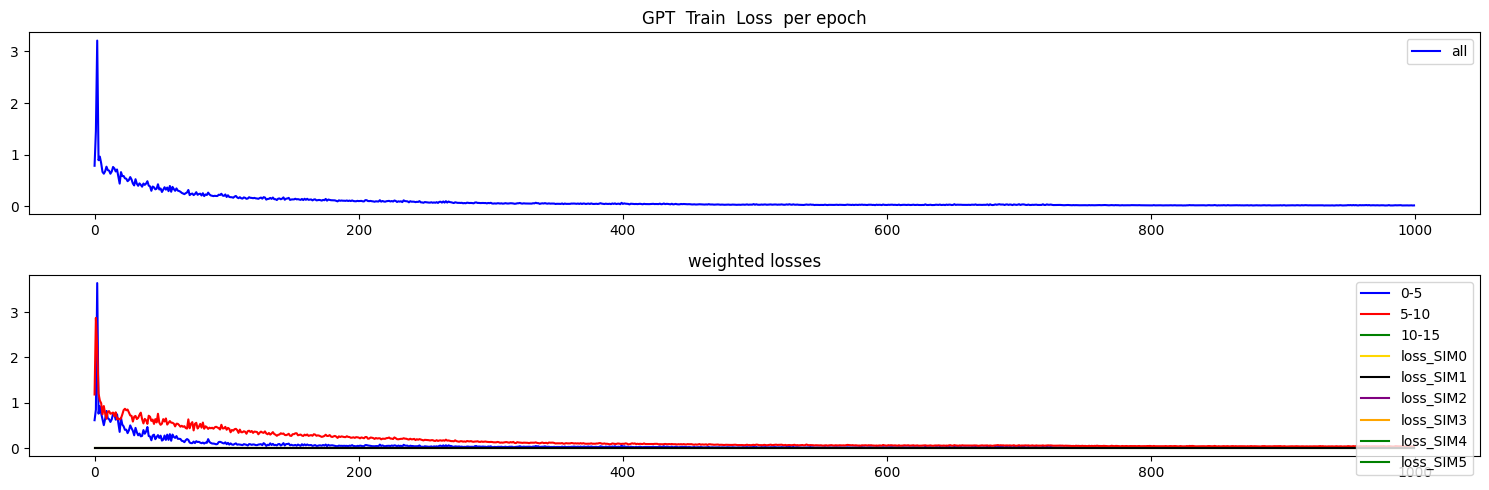

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


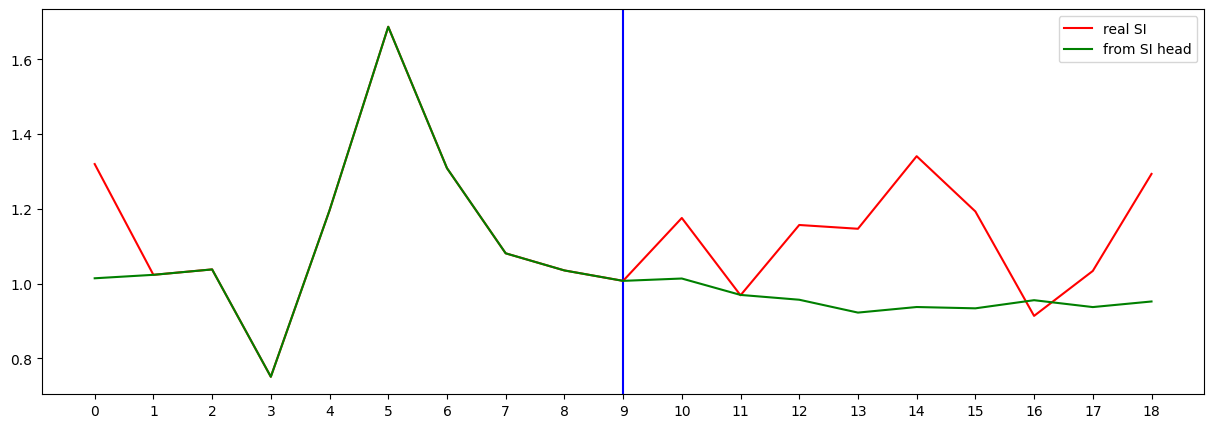

Testing R**2 - (all) - (no inputs):  0.9871453118019717
Testing R**2 - (f2) - SI full (no inputs):  -2.777610229281264
Testing R**2 - SI head only (no inputs):  -2.0649820552753946
0 ...index R**2 (no inputs):  -0.29892304901421785
1 ...index R**2 (no inputs):  0.26126749629228163
2 ...index R**2 (no inputs):  -2.777610229281264
3 ...index R**2 (no inputs):  -6696.137330058587
4 ...index R**2 (no inputs):  -0.0642077832601946
5 ...index R**2 (no inputs):  -1.5234019595318022
6 ...index R**2 (no inputs):  -1599.366678965359
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.6346884869420251
10 ...index R**2 (no inputs):  -1.129101926838982
11 ...index R**2 (no inputs):  -112.56280019227863
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.6558742440042558
16 ...index R**2 (no inputs):  -0.4643799606211698
17 ...index R**2 (no inputs):  -525.551718356

In [25]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk300to400_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 0.640394
Loss_SI: 0.47922539710998535 Loss_all: 1.0164539813995361
===
[200] Train Loss: 0.166797
Loss_SI: 0.09059284627437592 Loss_all: 0.344606876373291
===
[400] Train Loss: 0.133286
Loss_SI: 0.07857953757047653 Loss_all: 0.26093360781669617
===
[600] Train Loss: 0.071287
Loss_SI: 0.03935396671295166 Loss_all: 0.14579598605632782
===
[800] Train Loss: 0.063197
Loss_SI: 0.039263684302568436 Loss_all: 0.1190401092171669
===


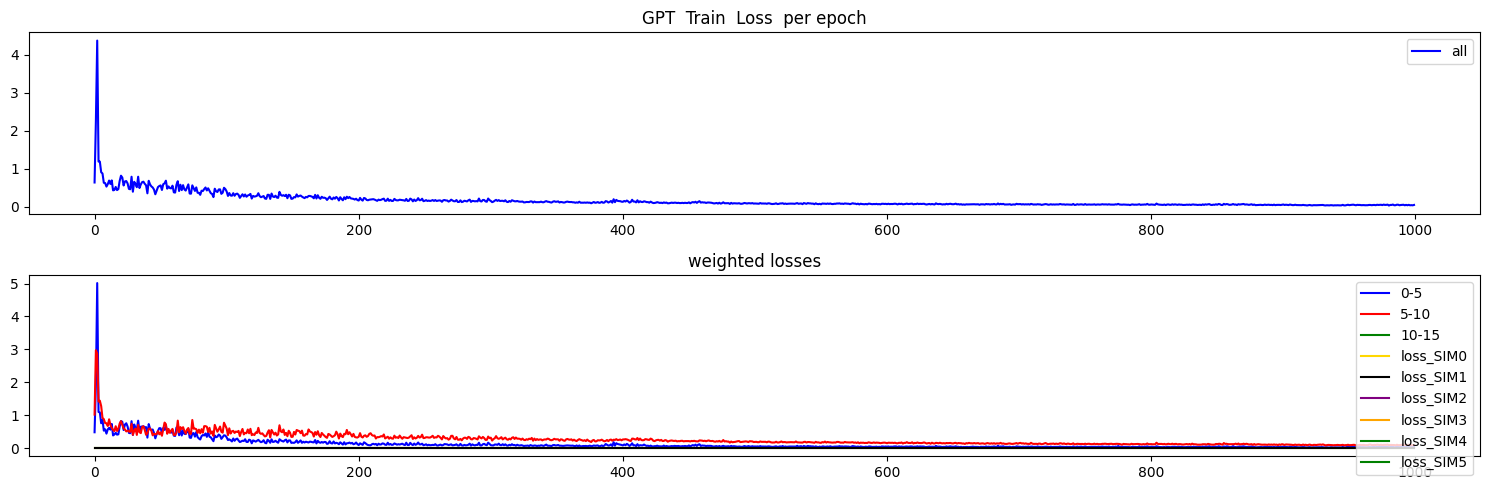

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


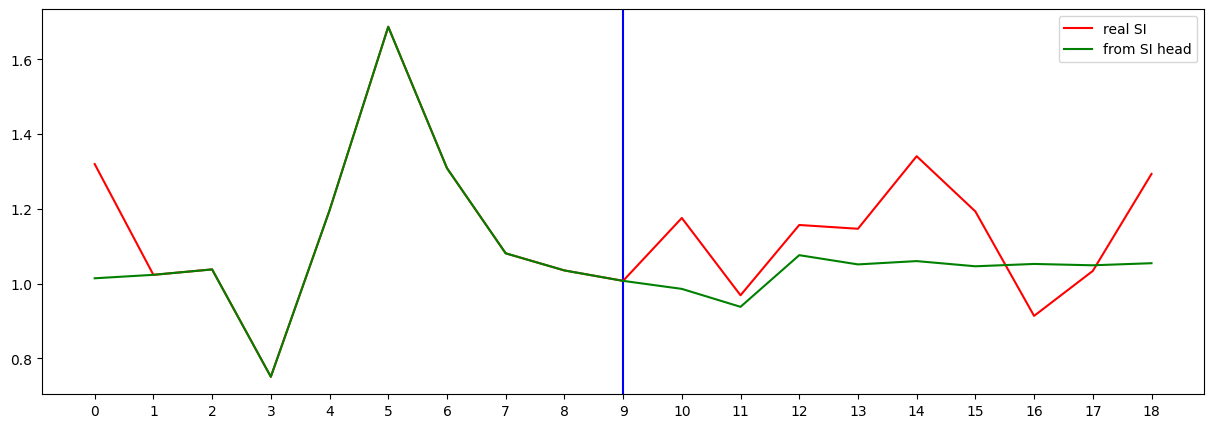

Testing R**2 - (all) - (no inputs):  0.9871493015397695
Testing R**2 - (f2) - SI full (no inputs):  -0.34480059600135404
Testing R**2 - SI head only (no inputs):  -0.5940807504280654
0 ...index R**2 (no inputs):  -0.20204163144164222
1 ...index R**2 (no inputs):  -0.0946976984376302
2 ...index R**2 (no inputs):  -0.34480059600135404
3 ...index R**2 (no inputs):  -45404.05395981075
4 ...index R**2 (no inputs):  -1.890207142449642
5 ...index R**2 (no inputs):  -1.5342707516452965
6 ...index R**2 (no inputs):  -162.5443836746993
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.3818780728273614
10 ...index R**2 (no inputs):  -0.35628906760008583
11 ...index R**2 (no inputs):  -1.2320956566497037
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -5.806661648157289
16 ...index R**2 (no inputs):  -0.02141383971766575
17 ...index R**2 (no inputs):  -4.080749

In [26]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk200to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 0.665493
Loss_SI: 0.5134216547012329 Loss_all: 1.0203267335891724
===
[200] Train Loss: 0.247462
Loss_SI: 0.19597859680652618 Loss_all: 0.36759111285209656
===
[400] Train Loss: 0.137311
Loss_SI: 0.08375019580125809 Loss_all: 0.26228782534599304
===
[600] Train Loss: 0.131479
Loss_SI: 0.07092545181512833 Loss_all: 0.27277103066444397
===
[800] Train Loss: 0.087190
Loss_SI: 0.040323056280612946 Loss_all: 0.19654671847820282
===


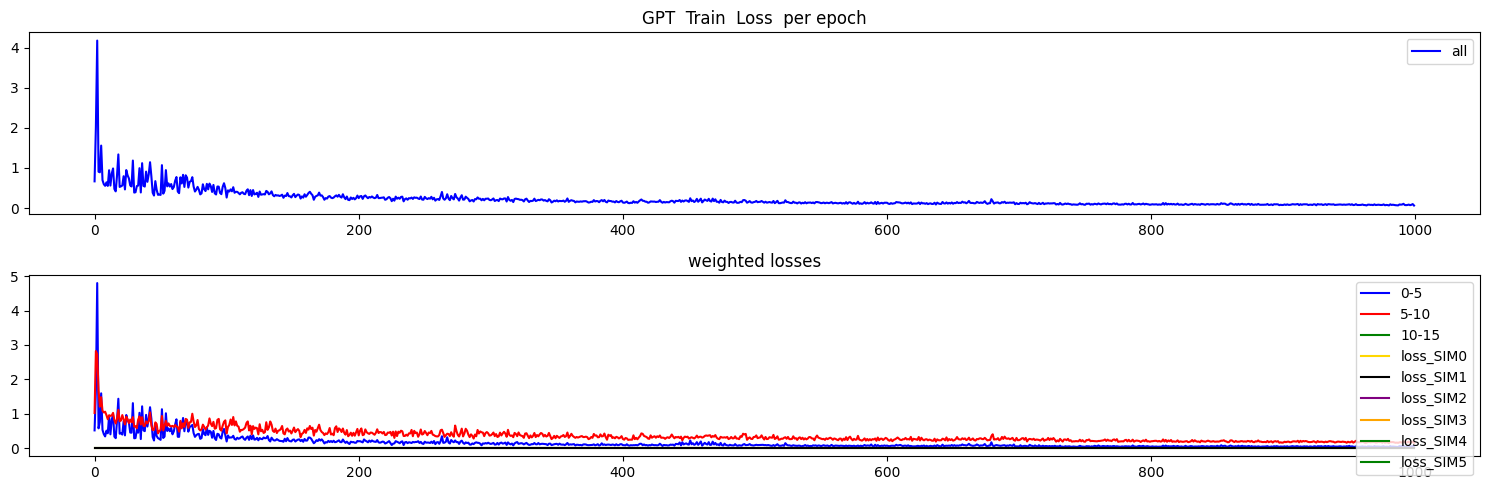

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


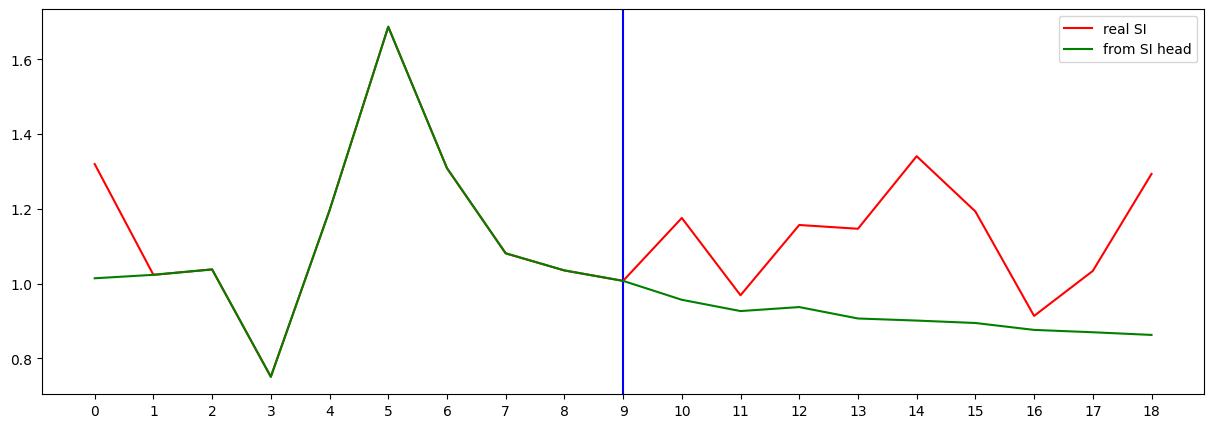

Testing R**2 - (all) - (no inputs):  0.9947923655888632
Testing R**2 - (f2) - SI full (no inputs):  -3.1201007454303724
Testing R**2 - SI head only (no inputs):  -3.130190501482039
0 ...index R**2 (no inputs):  -0.10200323064117045
1 ...index R**2 (no inputs):  -0.1808353203954065
2 ...index R**2 (no inputs):  -3.1201007454303724
3 ...index R**2 (no inputs):  -32300.62767539192
4 ...index R**2 (no inputs):  -4.197989279817711
5 ...index R**2 (no inputs):  -0.02452052631272772
6 ...index R**2 (no inputs):  -9.1667583963161
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.05913092670745623
10 ...index R**2 (no inputs):  -0.30717225456545094
11 ...index R**2 (no inputs):  -33.35169664549375
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -8.883457254221875
16 ...index R**2 (no inputs):  -1.615564157542508
17 ...index R**2 (no inputs):  -31.35490236811

In [27]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk100to400_train,  
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 0.757174
Loss_SI: 0.49505746364593506 Loss_all: 1.3687809705734253
===
[200] Train Loss: 0.305005
Loss_SI: 0.2467600703239441 Loss_all: 0.44090941548347473
===
[400] Train Loss: 0.177173
Loss_SI: 0.11348620057106018 Loss_all: 0.3257765471935272
===
[600] Train Loss: 0.117954
Loss_SI: 0.06949871778488159 Loss_all: 0.23101796209812164
===
[800] Train Loss: 0.099315
Loss_SI: 0.047309376299381256 Loss_all: 0.22066159546375275
===


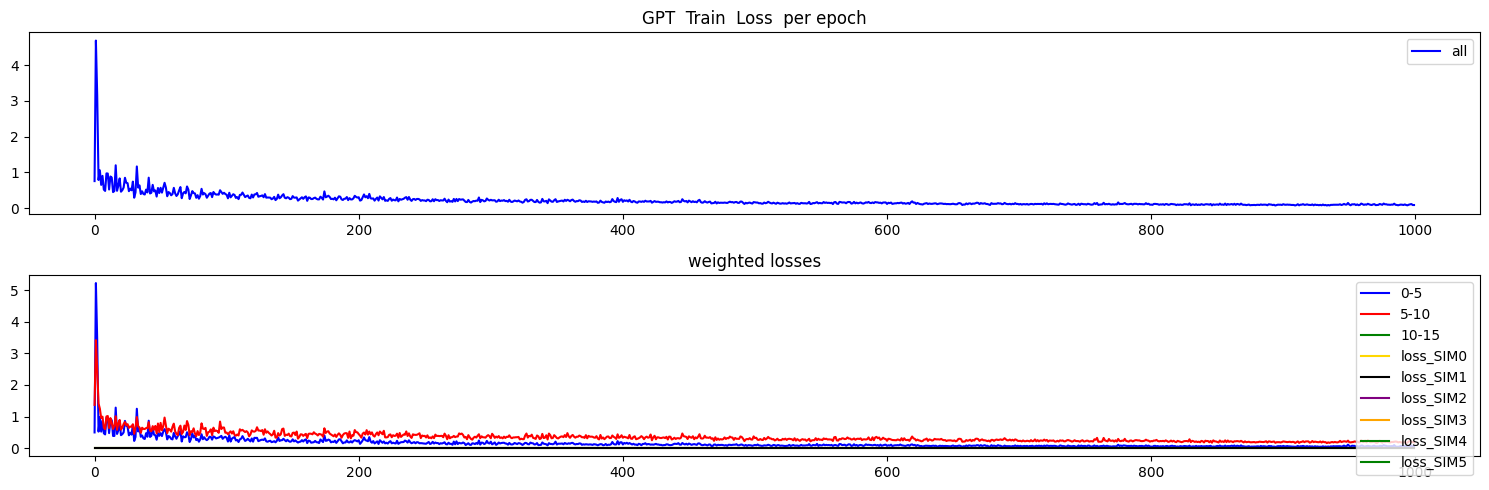

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


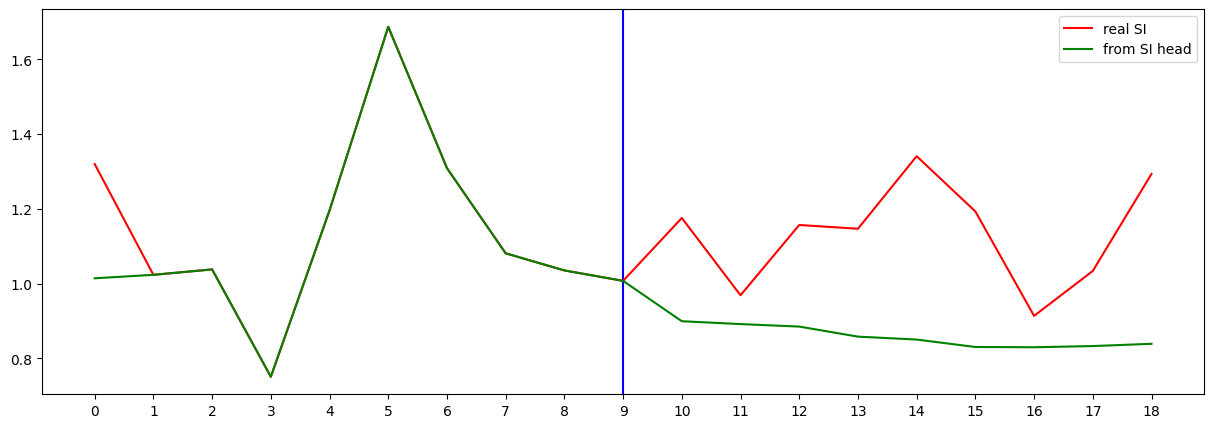

Testing R**2 - (all) - (no inputs):  0.9887225797432649
Testing R**2 - (f2) - SI full (no inputs):  -4.670308555216967
Testing R**2 - SI head only (no inputs):  -4.191719143029464
0 ...index R**2 (no inputs):  -0.0018714725203274885
1 ...index R**2 (no inputs):  -0.3203973979491441
2 ...index R**2 (no inputs):  -4.670308555216967
3 ...index R**2 (no inputs):  -9647.715220972812
4 ...index R**2 (no inputs):  -0.5891712998408063
5 ...index R**2 (no inputs):  -1.2196285883775162
6 ...index R**2 (no inputs):  -1540.2977690731234
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.22399066880691887
10 ...index R**2 (no inputs):  -0.20728425594360456
11 ...index R**2 (no inputs):  -66.17159824329016
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -11.287597693095801
16 ...index R**2 (no inputs):  -1.6840606115854202
17 ...index R**2 (no inputs):  -52.321297

In [28]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk000to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 2


In [29]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.132252
Loss_SI: 0.9977520108222961 Loss_all: 1.4460865259170532
===
[200] Train Loss: 0.091266
Loss_SI: 0.0362890399992466 Loss_all: 0.2195443958044052
===
[400] Train Loss: 0.048291
Loss_SI: 0.024437692016363144 Loss_all: 0.1039481908082962
===
[600] Train Loss: 0.035149
Loss_SI: 0.020599614828824997 Loss_all: 0.06909890472888947
===
[800] Train Loss: 0.022439
Loss_SI: 0.009819967672228813 Loss_all: 0.05188290774822235
===


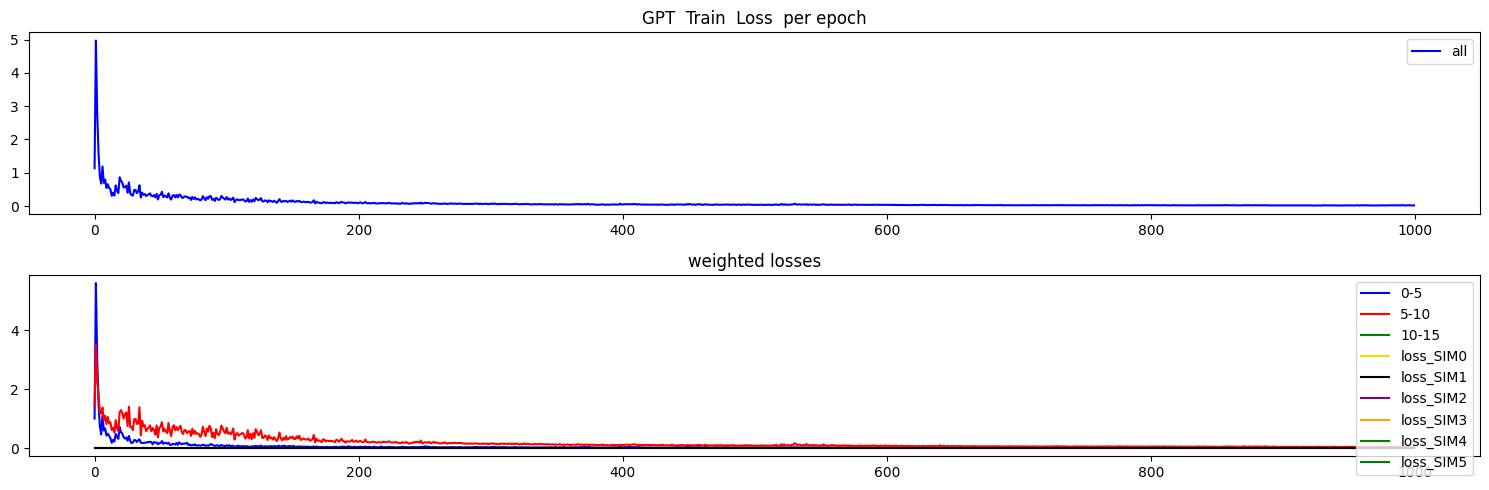

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


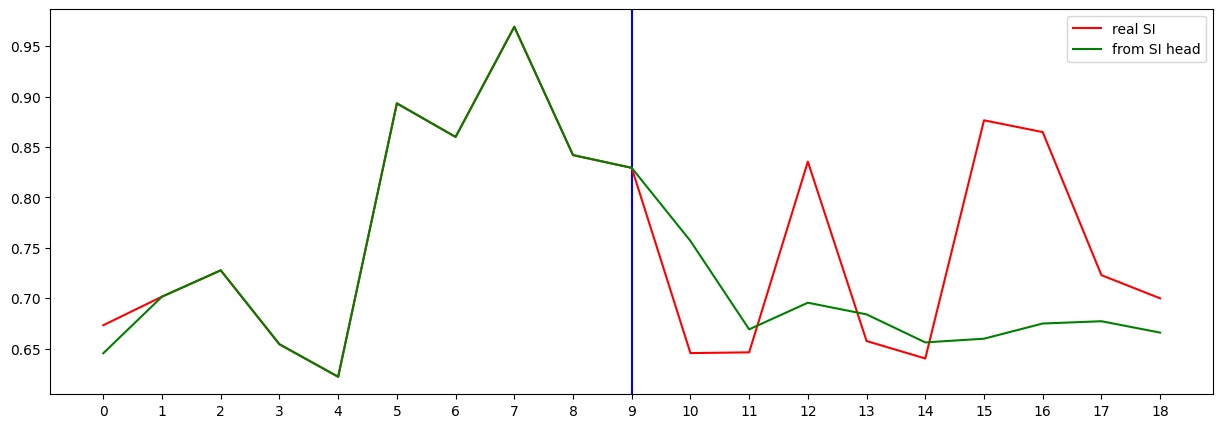

Testing R**2 - (all) - (no inputs):  0.9995375123757414
Testing R**2 - (f2) - SI full (no inputs):  -4.115612776908204
Testing R**2 - SI head only (no inputs):  -0.8218639552026377
0 ...index R**2 (no inputs):  -0.556595360169035
1 ...index R**2 (no inputs):  -0.26915627661753083
2 ...index R**2 (no inputs):  -4.115612776908204
3 ...index R**2 (no inputs):  -14.446558867331676
4 ...index R**2 (no inputs):  -4.607335090814259
5 ...index R**2 (no inputs):  -2.6183789147711205
6 ...index R**2 (no inputs):  -1.2751240894442315
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.19817663825557408
10 ...index R**2 (no inputs):  -1.088090573214016
11 ...index R**2 (no inputs):  -7.230170380028641
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.7461703849937744
16 ...index R**2 (no inputs):  -0.02520254151359791
17 ...index R**2 (no inputs):  -7.0881196750

In [30]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk300to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 0.826732
Loss_SI: 0.6840615272521973 Loss_all: 1.1596288681030273
===
[200] Train Loss: 0.166480
Loss_SI: 0.07800718396902084 Loss_all: 0.3729170262813568
===
[400] Train Loss: 0.113004
Loss_SI: 0.043695054948329926 Loss_all: 0.2747250497341156
===
[600] Train Loss: 0.058566
Loss_SI: 0.025568153709173203 Loss_all: 0.13556106388568878
===
[800] Train Loss: 0.052605
Loss_SI: 0.026900243014097214 Loss_all: 0.11258255690336227
===


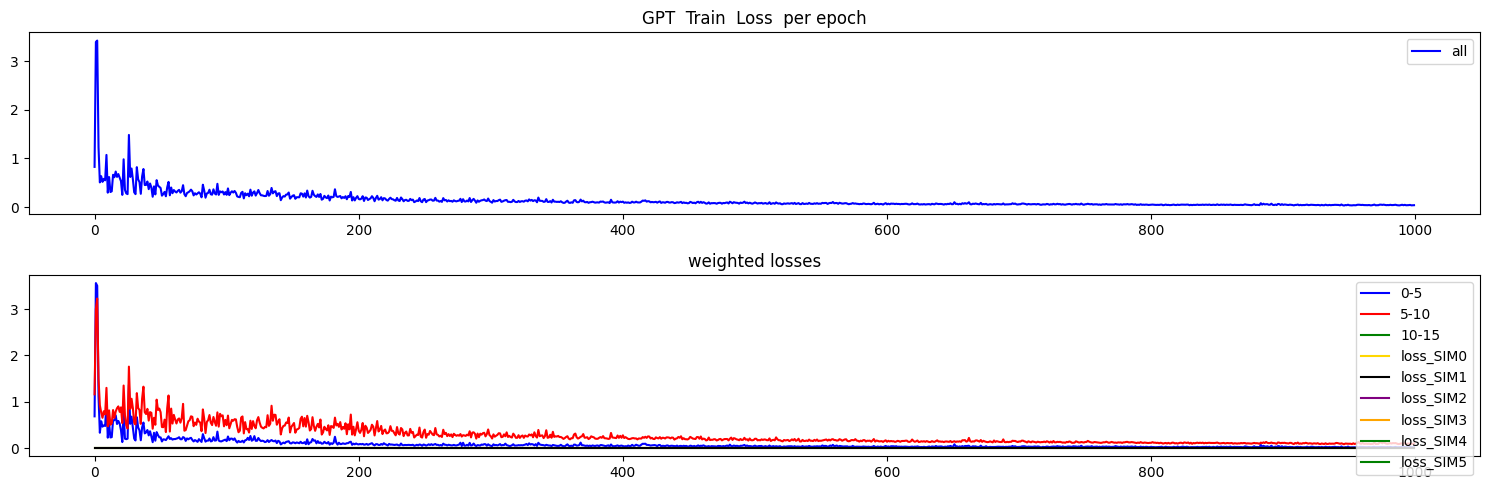

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


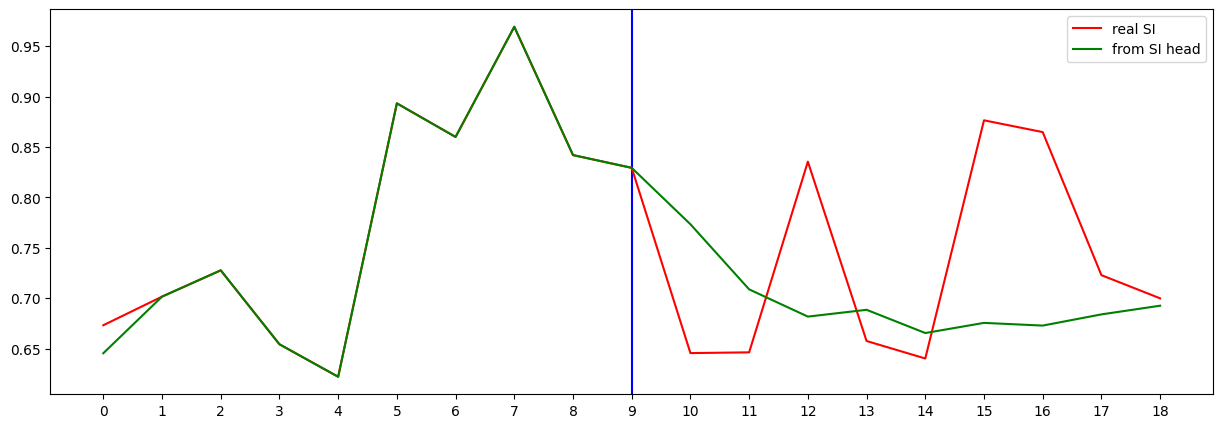

Testing R**2 - (all) - (no inputs):  0.9998471907450752
Testing R**2 - (f2) - SI full (no inputs):  -1.6308481652923201
Testing R**2 - SI head only (no inputs):  -0.5809945523008022
0 ...index R**2 (no inputs):  -0.308743188289041
1 ...index R**2 (no inputs):  -0.7719643139697527
2 ...index R**2 (no inputs):  -1.6308481652923201
3 ...index R**2 (no inputs):  -9.565728200153242
4 ...index R**2 (no inputs):  -3.4318154370748406
5 ...index R**2 (no inputs):  0.20145711789759724
6 ...index R**2 (no inputs):  -4.969389808960198
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.11583238802943141
10 ...index R**2 (no inputs):  -0.6582771276444226
11 ...index R**2 (no inputs):  -14.169131832854925
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.21787451882283349
16 ...index R**2 (no inputs):  -0.11957821643492639
17 ...index R**2 (no inputs):  -61.281778

In [31]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk200to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 0.601645
Loss_SI: 0.44106540083885193 Loss_all: 0.9763307571411133
===
[200] Train Loss: 0.417298
Loss_SI: 0.2463037222623825 Loss_all: 0.8162855505943298
===
[400] Train Loss: 0.182970
Loss_SI: 0.11160125583410263 Loss_all: 0.34949734807014465
===
[600] Train Loss: 0.112640
Loss_SI: 0.06298968940973282 Loss_all: 0.22849231958389282
===
[800] Train Loss: 0.078806
Loss_SI: 0.031186310574412346 Loss_all: 0.18991917371749878
===


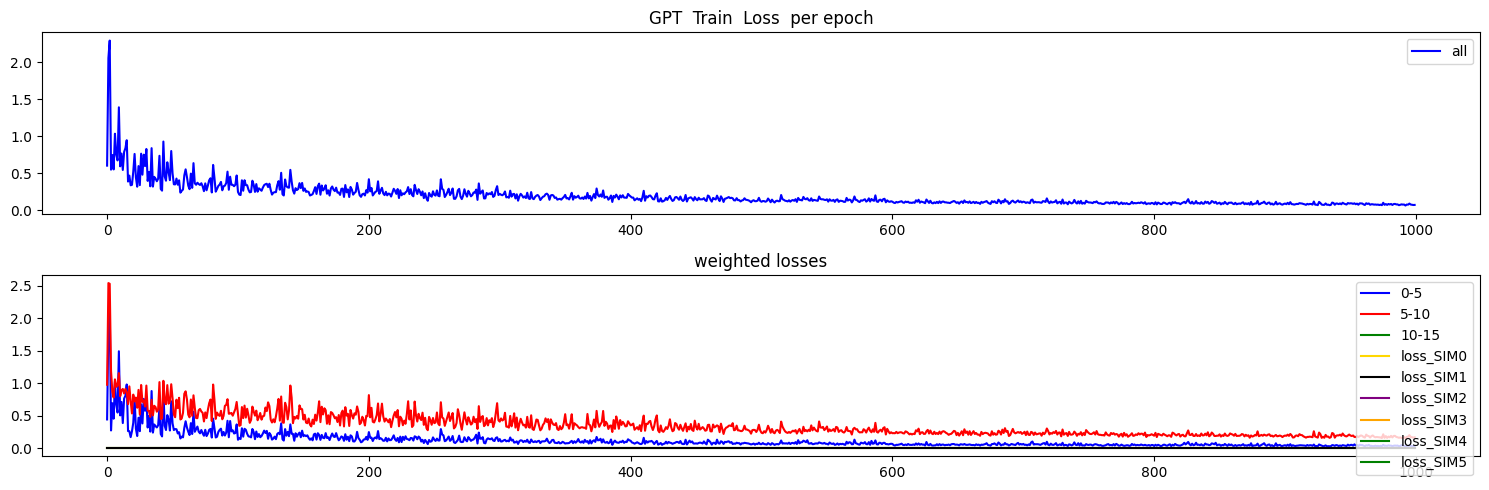

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


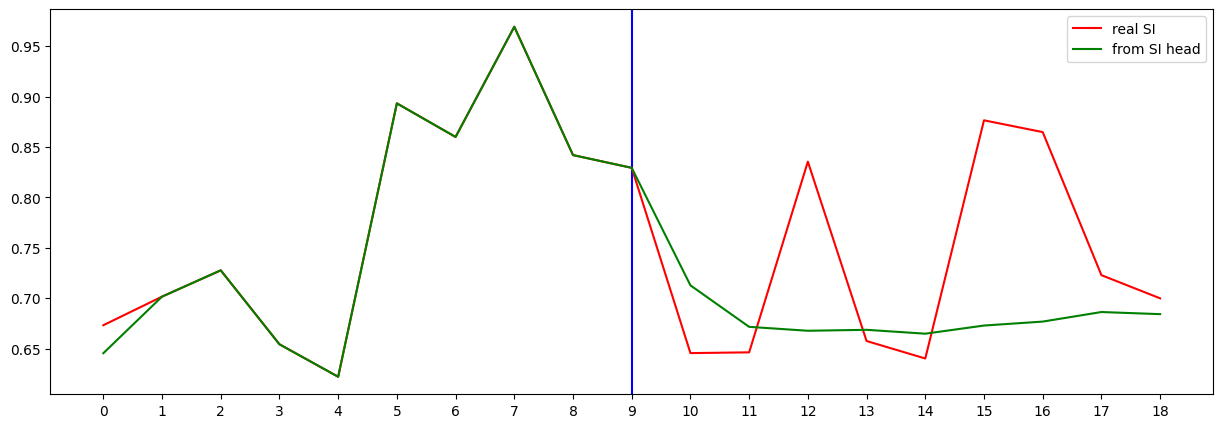

Testing R**2 - (all) - (no inputs):  0.9996301455290602
Testing R**2 - (f2) - SI full (no inputs):  -2.5026194689908814
Testing R**2 - SI head only (no inputs):  -0.5497188630521648
0 ...index R**2 (no inputs):  -0.28386951920265857
1 ...index R**2 (no inputs):  -0.3792839000415509
2 ...index R**2 (no inputs):  -2.5026194689908814
3 ...index R**2 (no inputs):  -8.51899469732089
4 ...index R**2 (no inputs):  -36.64287274247694
5 ...index R**2 (no inputs):  -1.5520417523240617
6 ...index R**2 (no inputs):  -9.350852252852647
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.12594931136045662
10 ...index R**2 (no inputs):  -0.17551780429275343
11 ...index R**2 (no inputs):  -17.53848390338546
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.8015155106832363
16 ...index R**2 (no inputs):  0.04925060032105477
17 ...index R**2 (no inputs):  -92.88354384

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk100to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 0.722644
Loss_SI: 0.4155607223510742 Loss_all: 1.439170479774475
===
[200] Train Loss: 0.273763
Loss_SI: 0.1810637265443802 Loss_all: 0.4900625944137573
===
[400] Train Loss: 0.109662
Loss_SI: 0.0590401217341423 Loss_all: 0.2277810275554657
===
[600] Train Loss: 0.169309
Loss_SI: 0.08224329352378845 Loss_all: 0.3724619746208191
===
[800] Train Loss: 0.090239
Loss_SI: 0.04126613214612007 Loss_all: 0.20450955629348755
===


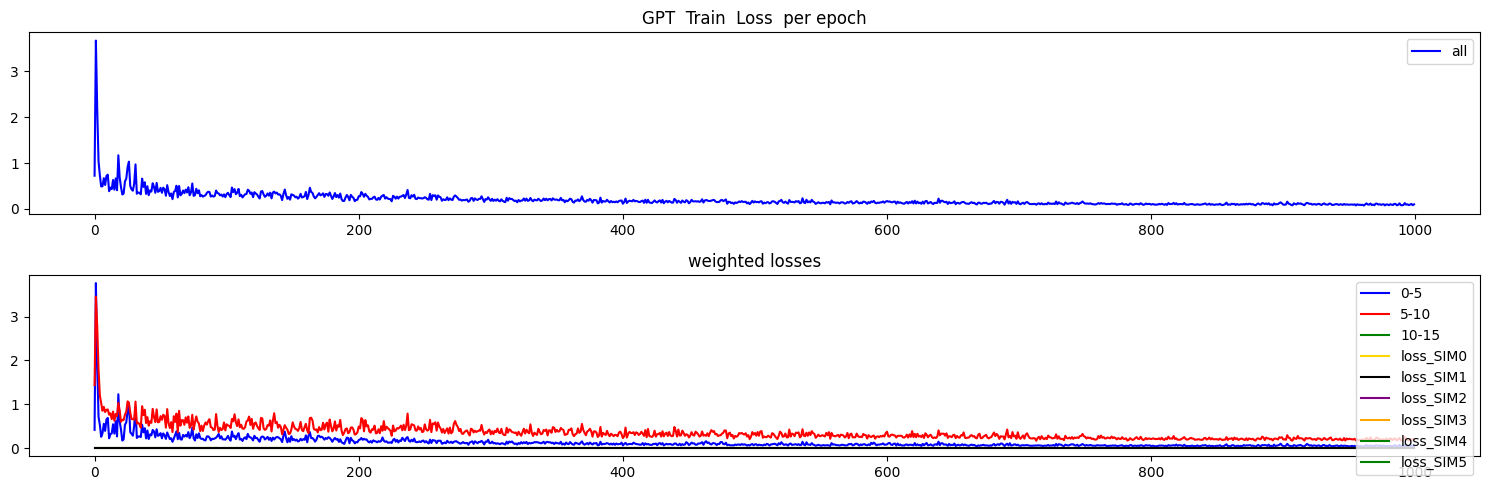

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


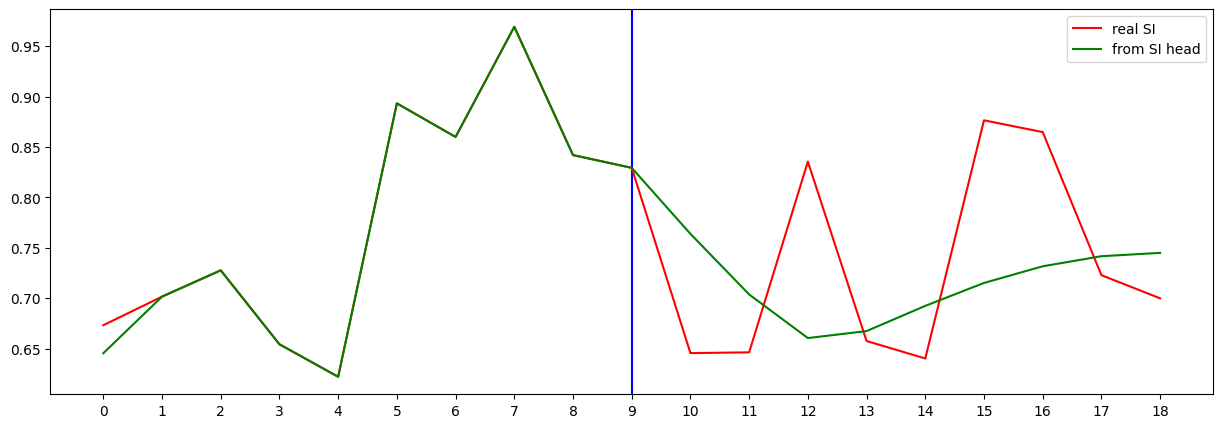

Testing R**2 - (all) - (no inputs):  0.9987407265338253
Testing R**2 - (f2) - SI full (no inputs):  -1.3814375771903045
Testing R**2 - SI head only (no inputs):  -0.2688087298655293
0 ...index R**2 (no inputs):  -0.6442558756369701
1 ...index R**2 (no inputs):  -15.288973959676344
2 ...index R**2 (no inputs):  -1.3814375771903045
3 ...index R**2 (no inputs):  -203.93284605608486
4 ...index R**2 (no inputs):  -21.1628395390193
5 ...index R**2 (no inputs):  -9.229875750622467
6 ...index R**2 (no inputs):  -35.245587379875595
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.3964795745221754
10 ...index R**2 (no inputs):  0.18912509129707933
11 ...index R**2 (no inputs):  -102.53036808267784
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.9956134413358271
16 ...index R**2 (no inputs):  -0.45750173951687056
17 ...index R**2 (no inputs):  -548.6371969

In [33]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk000to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 3


In [34]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.855204
Loss_SI: 0.6777617931365967 Loss_all: 1.2692358493804932
===
[200] Train Loss: 0.091136
Loss_SI: 0.03325588256120682 Loss_all: 0.22618822753429413
===
[400] Train Loss: 0.046405
Loss_SI: 0.022915983572602272 Loss_all: 0.10121355205774307
===
[600] Train Loss: 0.030398
Loss_SI: 0.016886813566088676 Loss_all: 0.061925292015075684
===
[800] Train Loss: 0.021356
Loss_SI: 0.01039360836148262 Loss_all: 0.04693438857793808
===


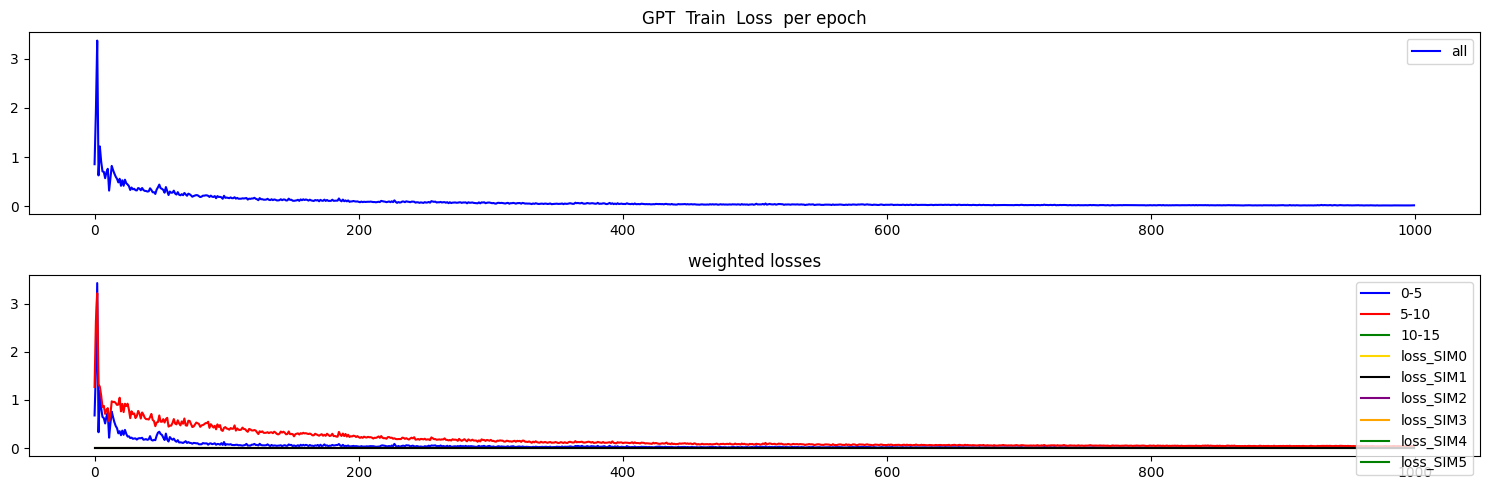

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


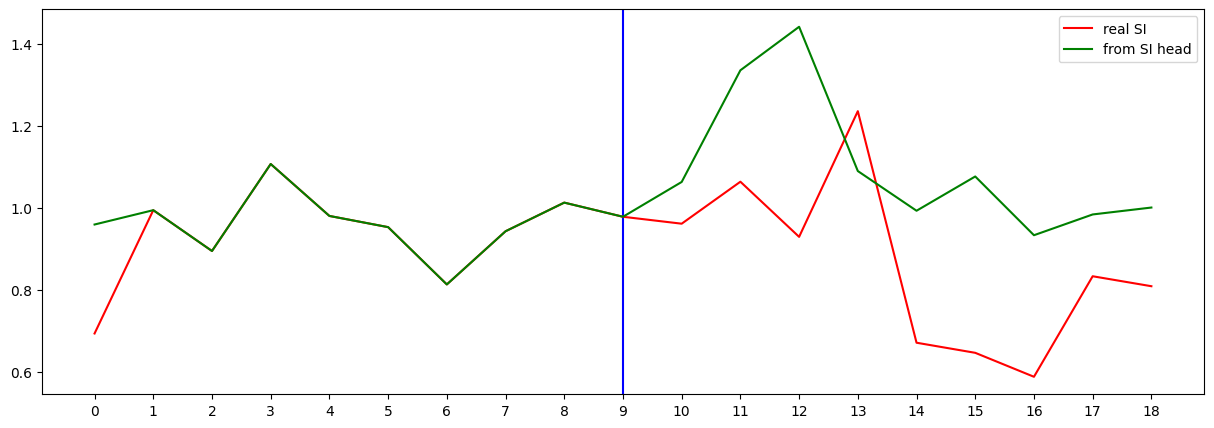

Testing R**2 - (all) - (no inputs):  0.9081241315482507
Testing R**2 - (f2) - SI full (no inputs):  -1.0732743539645528
Testing R**2 - SI head only (no inputs):  -1.3962921415092593
0 ...index R**2 (no inputs):  0.19220730177894585
1 ...index R**2 (no inputs):  -6.97945286844361
2 ...index R**2 (no inputs):  -1.0732743539645528
3 ...index R**2 (no inputs):  -1.0043425033197755
4 ...index R**2 (no inputs):  -1.1144116596262301
5 ...index R**2 (no inputs):  -0.7855695288269027
6 ...index R**2 (no inputs):  -0.44227389628083524
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.48626999560586626
10 ...index R**2 (no inputs):  -1.2498281006242187
11 ...index R**2 (no inputs):  -13.752905195622224
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.1214023392283434
16 ...index R**2 (no inputs):  -9.171605045579174
17 ...index R**2 (no inputs):  -18.05596356

In [35]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk300to400_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 1.380562
Loss_SI: 1.2748106718063354 Loss_all: 1.6273144483566284
===
[200] Train Loss: 0.182977
Loss_SI: 0.11939036846160889 Loss_all: 0.33134472370147705
===
[400] Train Loss: 0.089709
Loss_SI: 0.040438178926706314 Loss_all: 0.2046758085489273
===
[600] Train Loss: 0.065234
Loss_SI: 0.0293063223361969 Loss_all: 0.14906363189220428
===
[800] Train Loss: 0.051799
Loss_SI: 0.03142132982611656 Loss_all: 0.09934736043214798
===


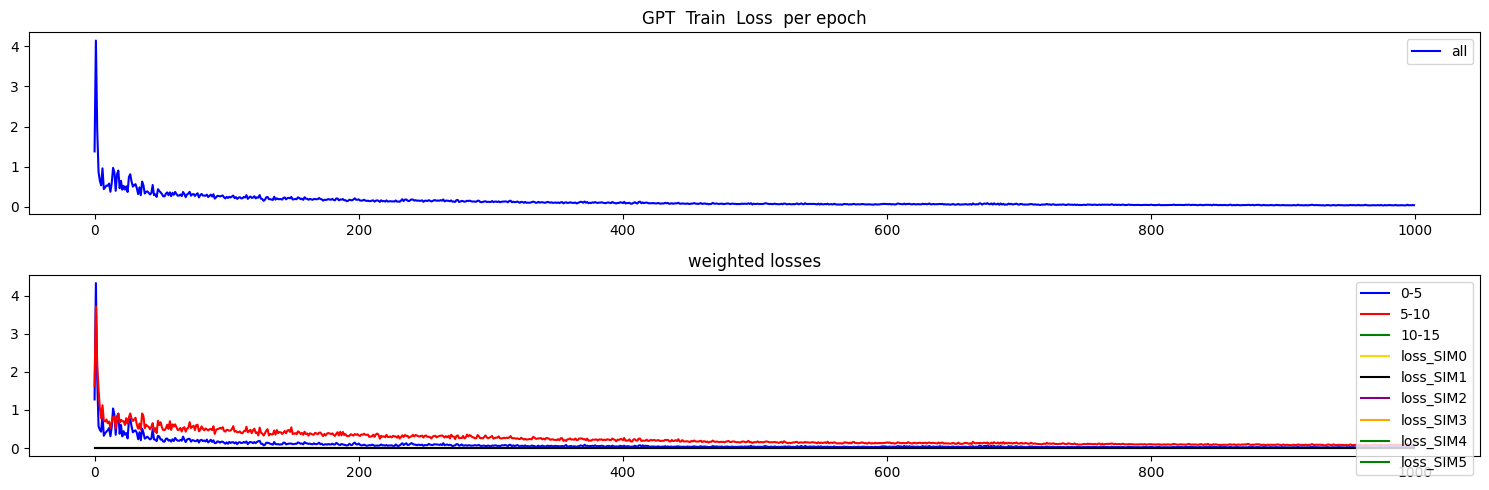

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


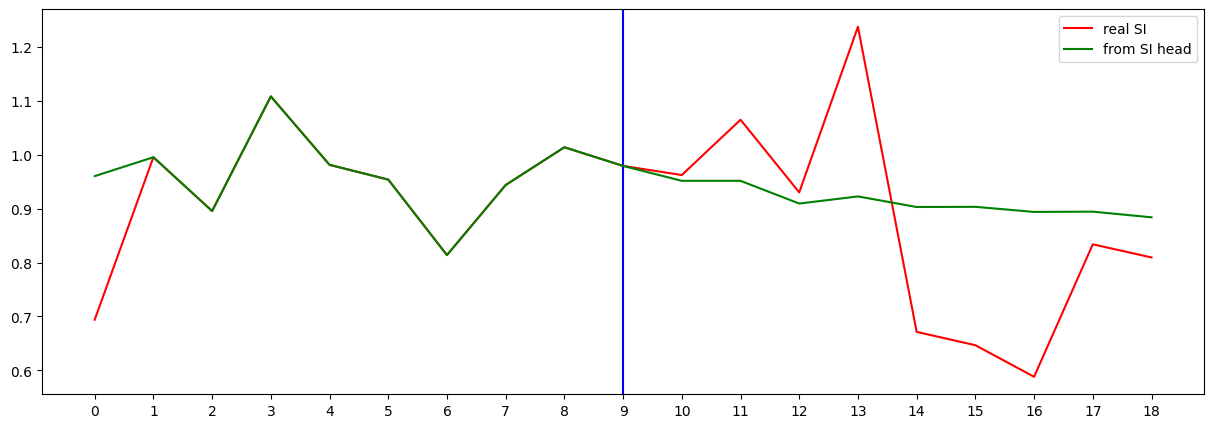

Testing R**2 - (all) - (no inputs):  0.9404835208841911
Testing R**2 - (f2) - SI full (no inputs):  -0.1332327357692571
Testing R**2 - SI head only (no inputs):  -0.07788568306330368
0 ...index R**2 (no inputs):  -0.18159552066153517
1 ...index R**2 (no inputs):  -1.4277826319233342
2 ...index R**2 (no inputs):  -0.1332327357692571
3 ...index R**2 (no inputs):  -0.9351666209975227
4 ...index R**2 (no inputs):  -0.5068957942873833
5 ...index R**2 (no inputs):  -0.15767405636025922
6 ...index R**2 (no inputs):  -0.2112904191968359
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.07348115806305922
10 ...index R**2 (no inputs):  -0.20360004733985582
11 ...index R**2 (no inputs):  -9.750602207368368
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.30499763887461495
16 ...index R**2 (no inputs):  -4.453338298953947
17 ...index R**2 (no inputs):  -143.97

In [36]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk200to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 0.530677
Loss_SI: 0.31548982858657837 Loss_all: 1.0327792167663574
===
[200] Train Loss: 0.254770
Loss_SI: 0.18229709565639496 Loss_all: 0.4238733649253845
===
[400] Train Loss: 0.140889
Loss_SI: 0.06567925214767456 Loss_all: 0.3163791596889496
===
[600] Train Loss: 0.100295
Loss_SI: 0.04359976574778557 Loss_all: 0.23258544504642487
===
[800] Train Loss: 0.071094
Loss_SI: 0.03509604185819626 Loss_all: 0.15508803725242615
===


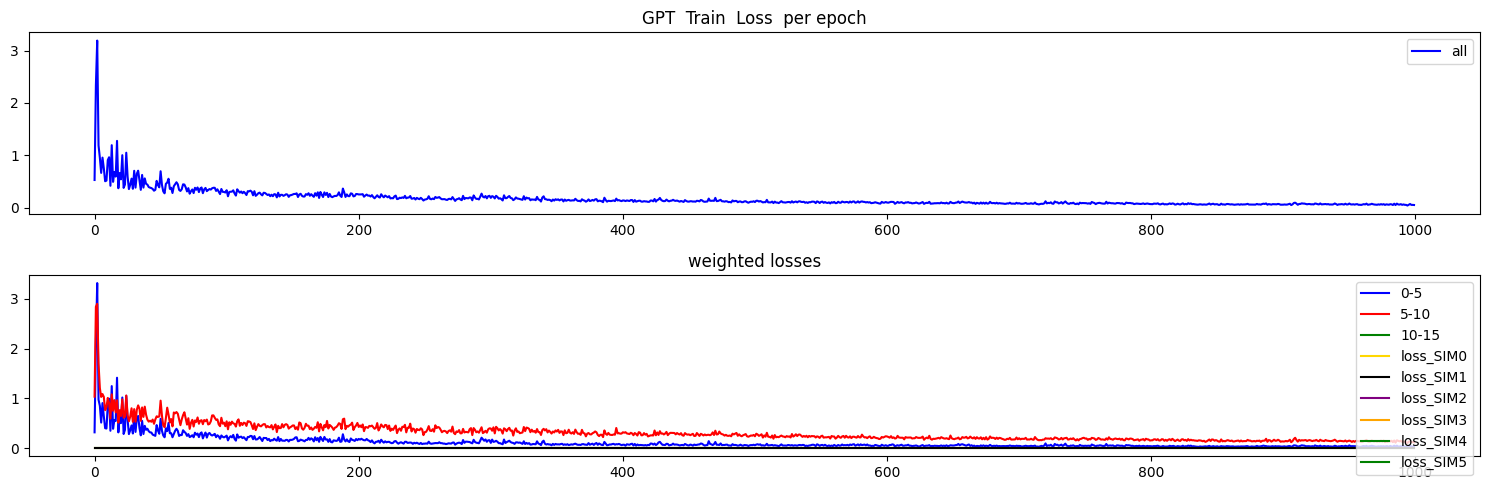

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


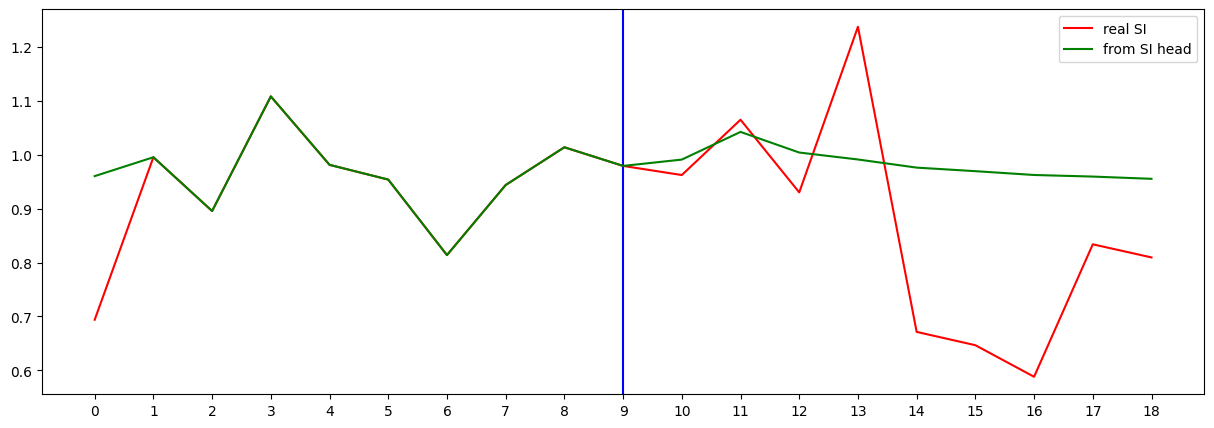

Testing R**2 - (all) - (no inputs):  0.9284846053246895
Testing R**2 - (f2) - SI full (no inputs):  -0.3173546454237903
Testing R**2 - SI head only (no inputs):  -0.45916818452315056
0 ...index R**2 (no inputs):  -0.033620287232768
1 ...index R**2 (no inputs):  0.21693651449760487
2 ...index R**2 (no inputs):  -0.3173546454237903
3 ...index R**2 (no inputs):  -0.7612036244737677
4 ...index R**2 (no inputs):  -0.6802250768222888
5 ...index R**2 (no inputs):  -0.39110789590724937
6 ...index R**2 (no inputs):  -0.28095840201533084
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.310980254219388
10 ...index R**2 (no inputs):  -0.9620991066587923
11 ...index R**2 (no inputs):  -0.4866065708088736
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.800259801156145
16 ...index R**2 (no inputs):  -0.8630397646453323
17 ...index R**2 (no inputs):  -5.1696269

In [37]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk100to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 0.695752
Loss_SI: 0.5829581022262573 Loss_all: 0.9589372873306274
===
[200] Train Loss: 0.348785
Loss_SI: 0.24599166214466095 Loss_all: 0.5886352062225342
===
[400] Train Loss: 0.220887
Loss_SI: 0.1261419951915741 Loss_all: 0.44195765256881714
===
[600] Train Loss: 0.182558
Loss_SI: 0.08824311196804047 Loss_all: 0.402627557516098
===
[800] Train Loss: 0.115954
Loss_SI: 0.05562465637922287 Loss_all: 0.2567238211631775
===


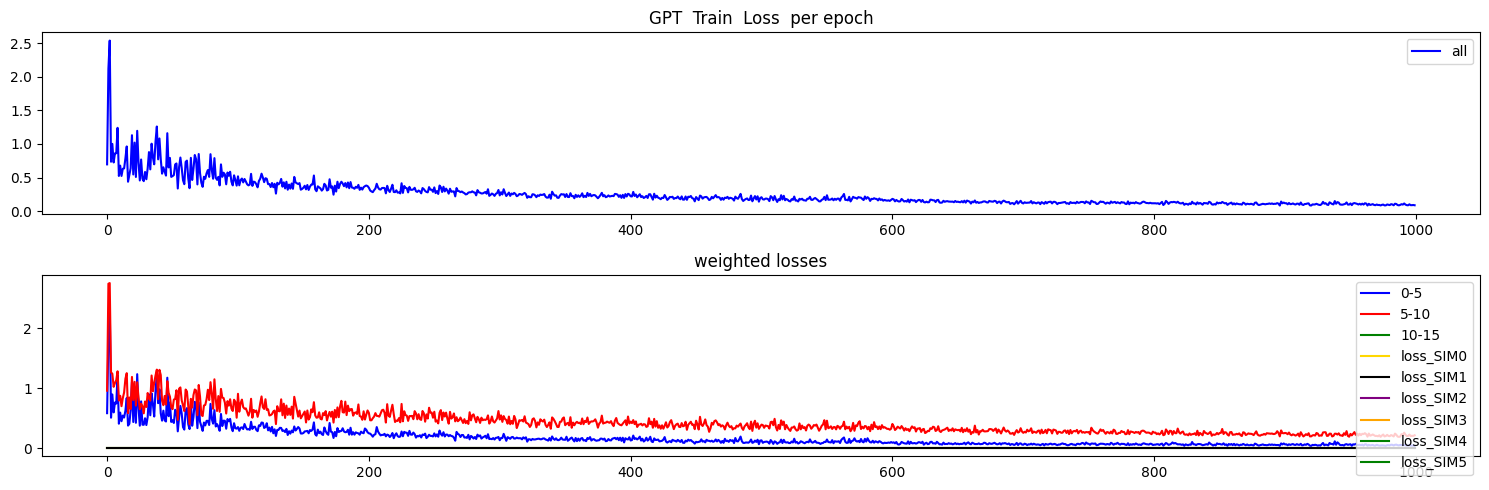

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


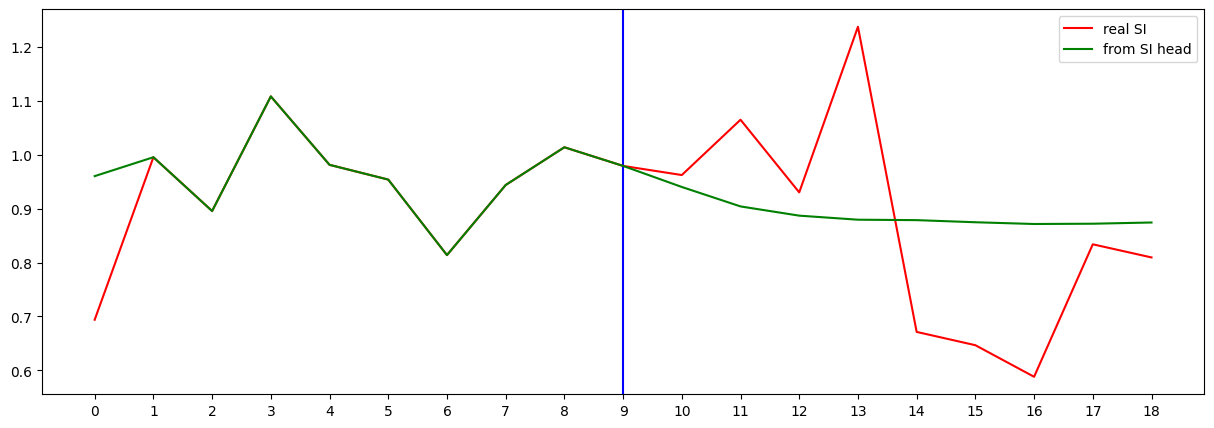

Testing R**2 - (all) - (no inputs):  0.9468551659257566
Testing R**2 - (f2) - SI full (no inputs):  0.060784584226268645
Testing R**2 - SI head only (no inputs):  0.030564772348857128
0 ...index R**2 (no inputs):  0.01594259350971916
1 ...index R**2 (no inputs):  0.23311826314269768
2 ...index R**2 (no inputs):  0.060784584226268645
3 ...index R**2 (no inputs):  -0.4955900263186652
4 ...index R**2 (no inputs):  -0.3598308785562385
5 ...index R**2 (no inputs):  -0.031774025243883175
6 ...index R**2 (no inputs):  -0.01343704158779091
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.22904379592418644
10 ...index R**2 (no inputs):  0.025204470075072205
11 ...index R**2 (no inputs):  -2.2141799586144084
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  0.11873393388444542
16 ...index R**2 (no inputs):  -0.11611476647597896
17 ...index R**2 (no inputs):  -

In [38]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk000to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 4


In [39]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.863170
Loss_SI: 0.6690754294395447 Loss_all: 1.316056489944458
===
[200] Train Loss: 0.077296
Loss_SI: 0.03768704831600189 Loss_all: 0.1697174310684204
===
[400] Train Loss: 0.034914
Loss_SI: 0.012653076089918613 Loss_all: 0.08685579895973206
===
[600] Train Loss: 0.025100
Loss_SI: 0.010392514988780022 Loss_all: 0.05941883474588394
===
[800] Train Loss: 0.022268
Loss_SI: 0.012431604787707329 Loss_all: 0.04521879181265831
===


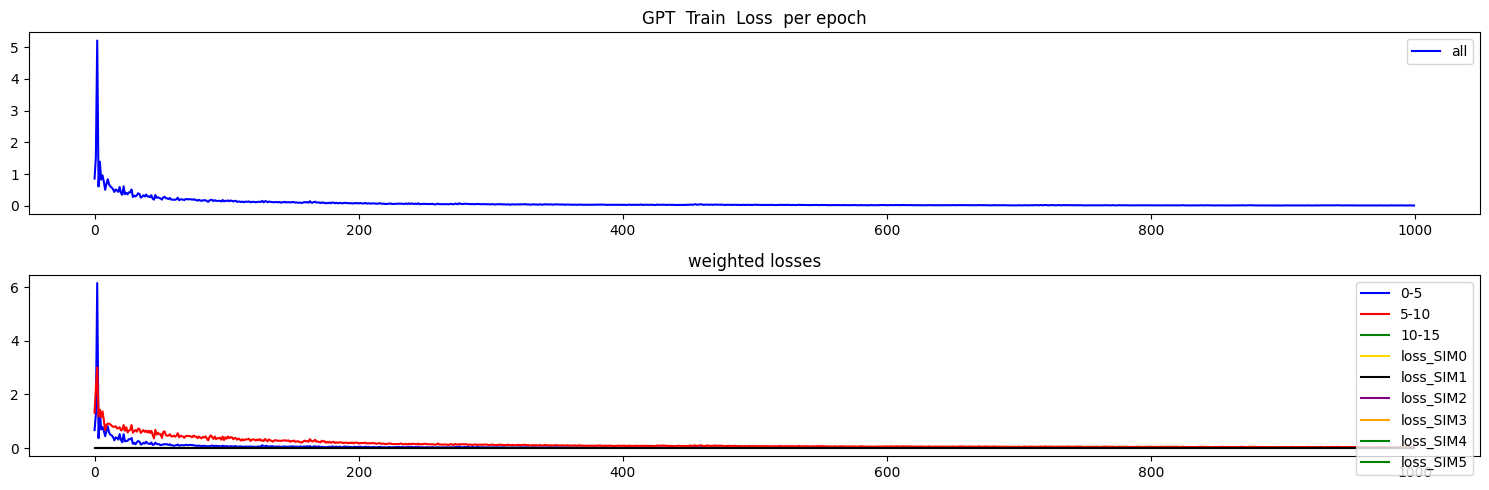

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


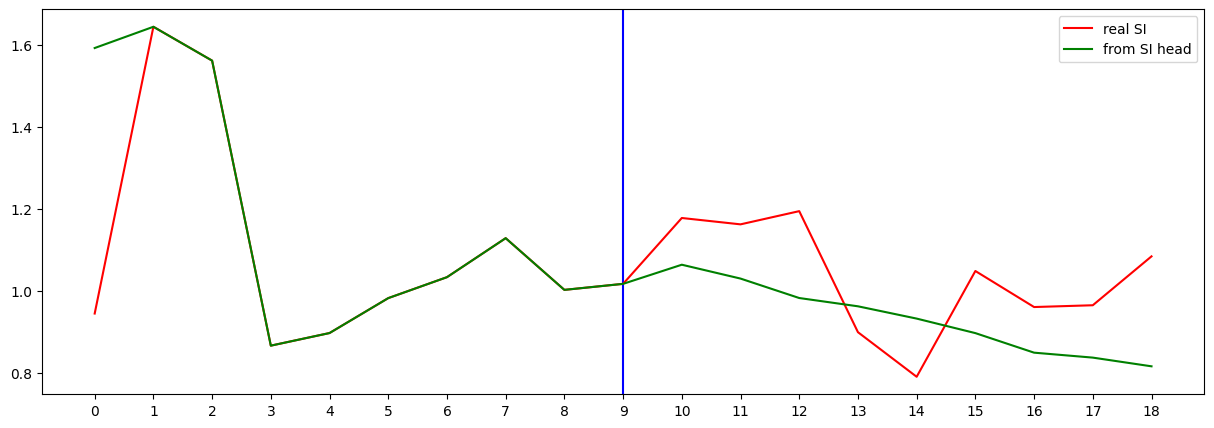

Testing R**2 - (all) - (no inputs):  0.9896848417276813
Testing R**2 - (f2) - SI full (no inputs):  -0.39797388986196425
Testing R**2 - SI head only (no inputs):  -0.3638818708653502
0 ...index R**2 (no inputs):  -0.09000475412551379
1 ...index R**2 (no inputs):  -0.7646953220073773
2 ...index R**2 (no inputs):  -0.39797388986196425
3 ...index R**2 (no inputs):  -1.074949033757259
4 ...index R**2 (no inputs):  -12.296127286275862
5 ...index R**2 (no inputs):  -1.4021108223723289
6 ...index R**2 (no inputs):  -118.6859185748497
7 ...index R**2 (no inputs):  -34.04742766090236
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.6812167653484704
10 ...index R**2 (no inputs):  -1.7875401383106486
11 ...index R**2 (no inputs):  -6.780243363682081
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.387875533773967
16 ...index R**2 (no inputs):  -0.7402685210454283
17 ...index R**2 (no inputs

In [40]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk300to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 0.691414
Loss_SI: 0.4756765365600586 Loss_all: 1.1948022842407227
===
[200] Train Loss: 0.217184
Loss_SI: 0.11094291508197784 Loss_all: 0.4650796949863434
===
[400] Train Loss: 0.111085
Loss_SI: 0.05861788988113403 Loss_all: 0.23350830376148224
===
[600] Train Loss: 0.078335
Loss_SI: 0.037102583795785904 Loss_all: 0.17454278469085693
===
[800] Train Loss: 0.050866
Loss_SI: 0.02560250088572502 Loss_all: 0.10981567203998566
===


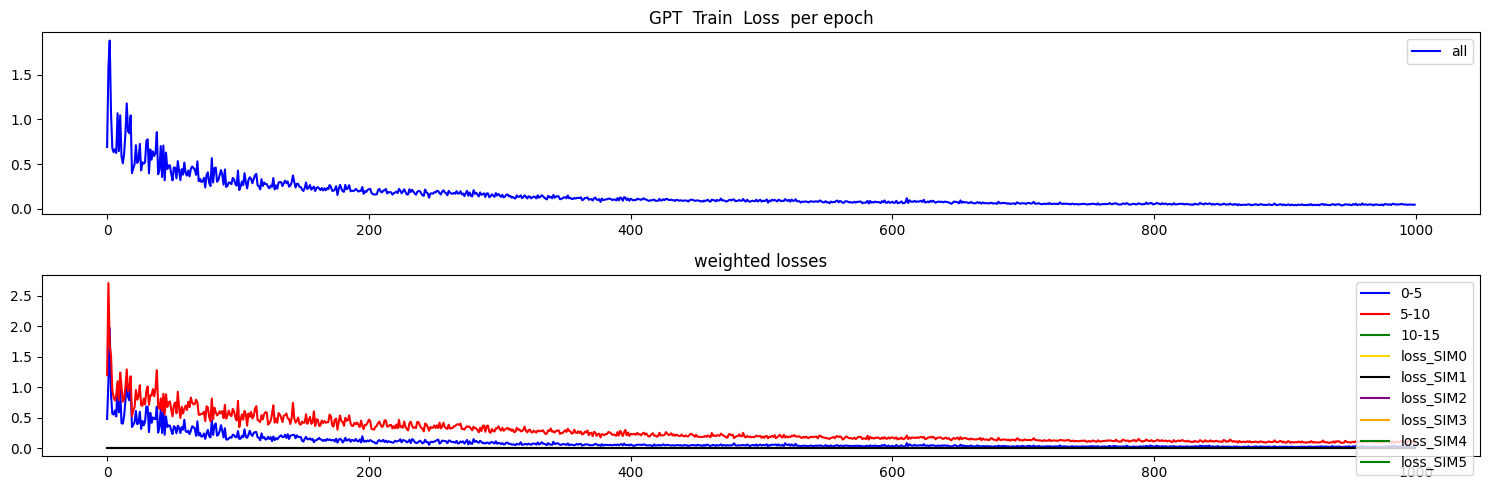

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


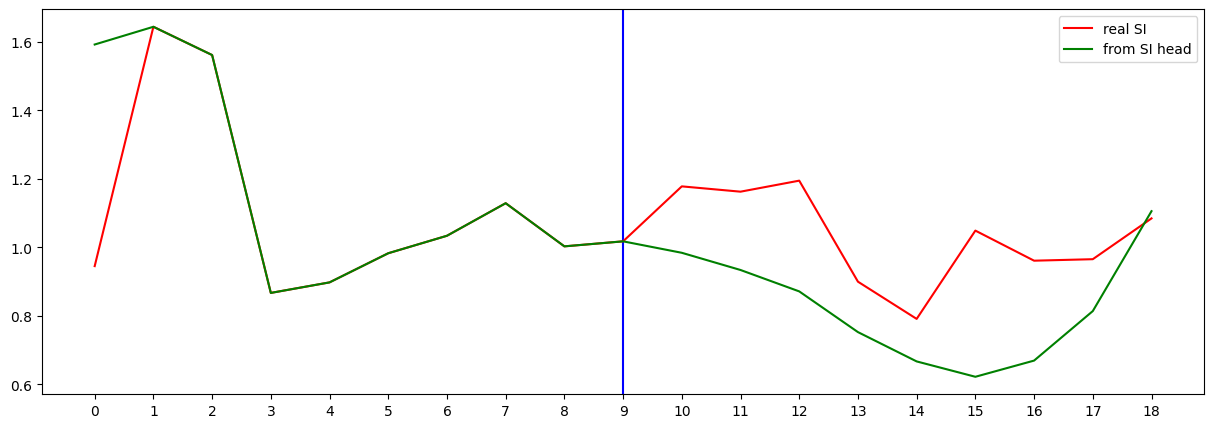

Testing R**2 - (all) - (no inputs):  0.9297622883009948
Testing R**2 - (f2) - SI full (no inputs):  -3.48904966723003
Testing R**2 - SI head only (no inputs):  -3.133325727391788
0 ...index R**2 (no inputs):  -0.40951029077252543
1 ...index R**2 (no inputs):  -3.8898741720463894
2 ...index R**2 (no inputs):  -3.48904966723003
3 ...index R**2 (no inputs):  -22.636998087360112
4 ...index R**2 (no inputs):  -16.20564027745358
5 ...index R**2 (no inputs):  -15.834069609668383
6 ...index R**2 (no inputs):  -132.27185601100496
7 ...index R**2 (no inputs):  -61.43168668801952
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.233848575249164
10 ...index R**2 (no inputs):  -0.4607097905004136
11 ...index R**2 (no inputs):  -53.99195276375045
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -14.044247789139895
16 ...index R**2 (no inputs):  -9.656947972137674
17 ...index R**2 (no inputs):  -10

In [41]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk200to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 0.618109
Loss_SI: 0.4198218584060669 Loss_all: 1.080777883529663
===
[200] Train Loss: 0.196948
Loss_SI: 0.1434643715620041 Loss_all: 0.3217436671257019
===
[400] Train Loss: 0.152382
Loss_SI: 0.10579687356948853 Loss_all: 0.26107949018478394
===
[600] Train Loss: 0.098171
Loss_SI: 0.05056922882795334 Loss_all: 0.2092418521642685
===
[800] Train Loss: 0.073048
Loss_SI: 0.03893041983246803 Loss_all: 0.15265631675720215
===


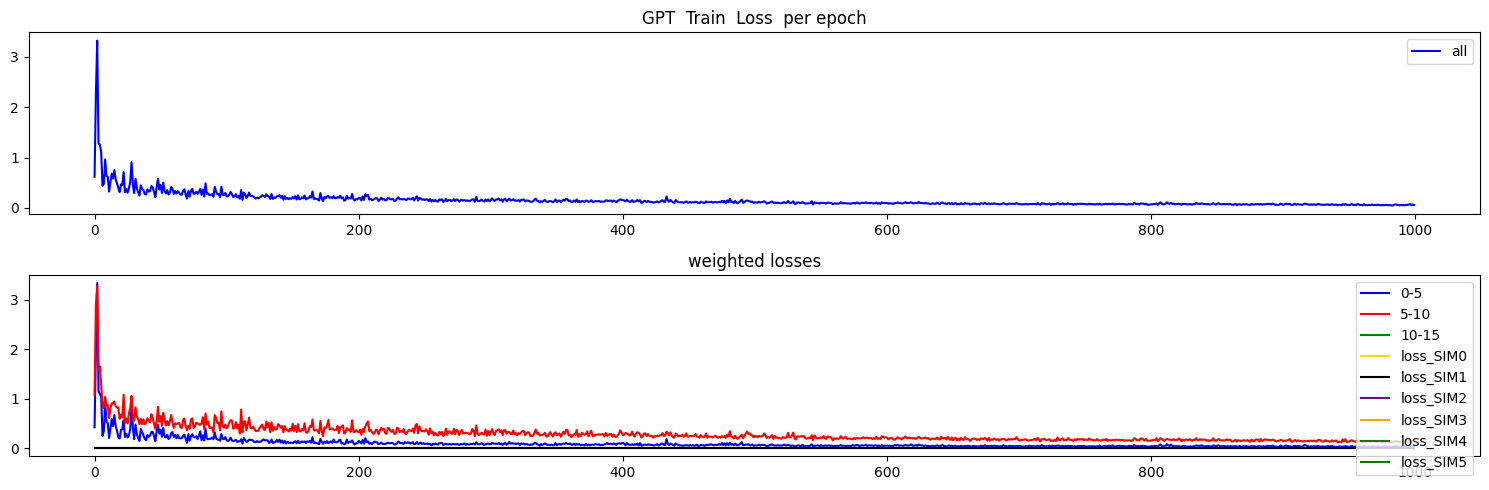

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


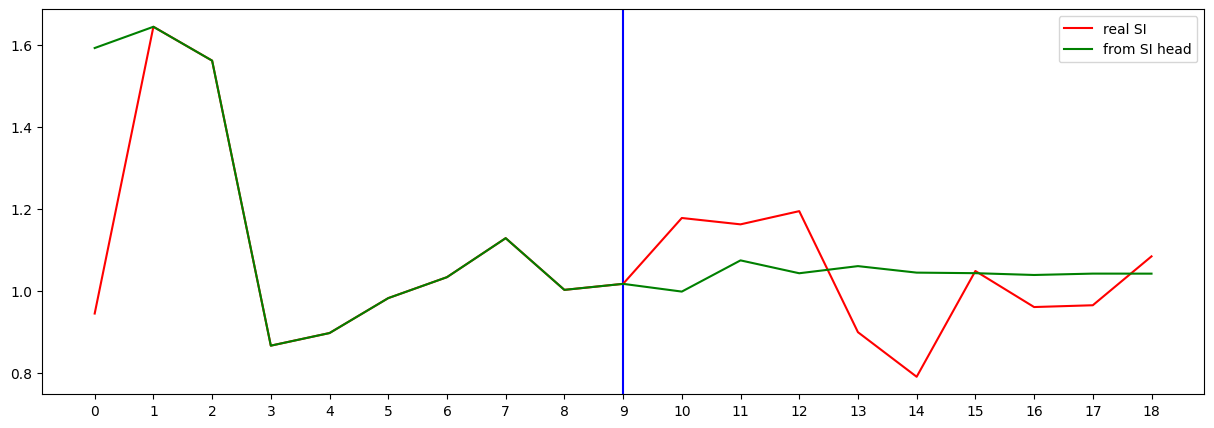

Testing R**2 - (all) - (no inputs):  0.9940819444941772
Testing R**2 - (f2) - SI full (no inputs):  -1.420274756642864
Testing R**2 - SI head only (no inputs):  -0.18877535648562072
0 ...index R**2 (no inputs):  0.05733445772045731
1 ...index R**2 (no inputs):  -0.14413027432429626
2 ...index R**2 (no inputs):  -1.420274756642864
3 ...index R**2 (no inputs):  -5.929976561235527
4 ...index R**2 (no inputs):  -26.50871957992704
5 ...index R**2 (no inputs):  -0.3133494167808122
6 ...index R**2 (no inputs):  -252.5070234229248
7 ...index R**2 (no inputs):  -87.56561215013494
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.0118388170153279
10 ...index R**2 (no inputs):  -0.15649792702556553
11 ...index R**2 (no inputs):  -134.95053732321466
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -7.359955761737988
16 ...index R**2 (no inputs):  -1.1336509237510466
17 ...index R**2 (no inputs):

In [42]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                              chunk100to400_train,
                              reasoning_steps=10,
                              backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 0.874477
Loss_SI: 0.745384156703949 Loss_all: 1.175693392753601
===
[200] Train Loss: 0.225271
Loss_SI: 0.13978472352027893 Loss_all: 0.42473822832107544
===
[400] Train Loss: 0.157551
Loss_SI: 0.10408417880535126 Loss_all: 0.2823059856891632
===
[600] Train Loss: 0.152139
Loss_SI: 0.08550435304641724 Loss_all: 0.30761855840682983
===
[800] Train Loss: 0.086555
Loss_SI: 0.04567496478557587 Loss_all: 0.18194226920604706
===


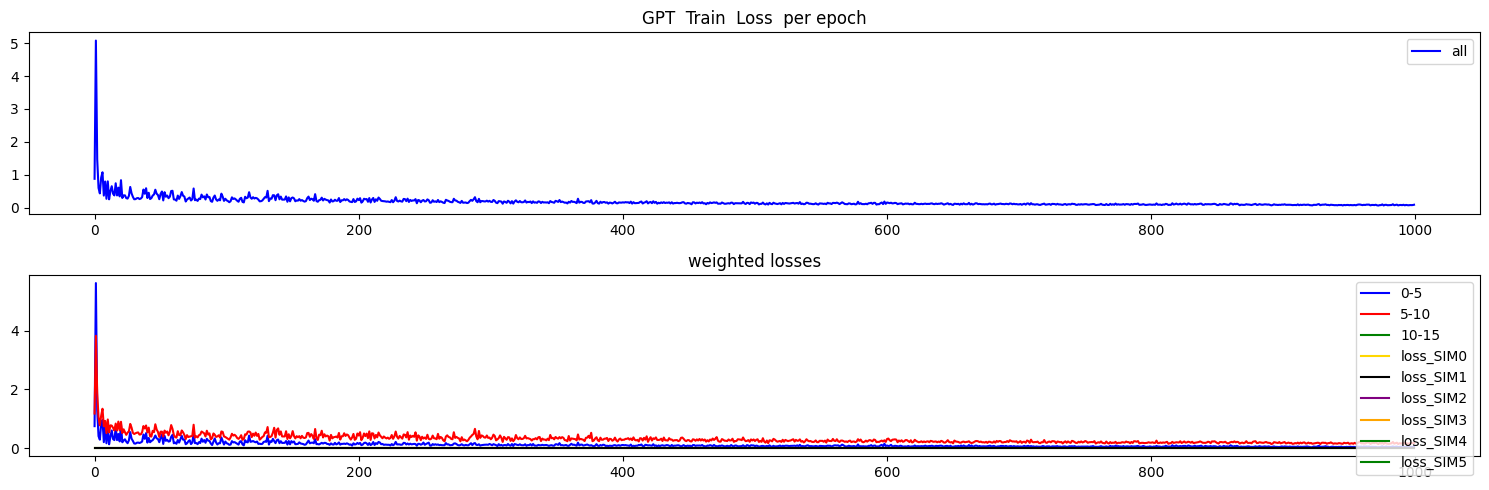

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


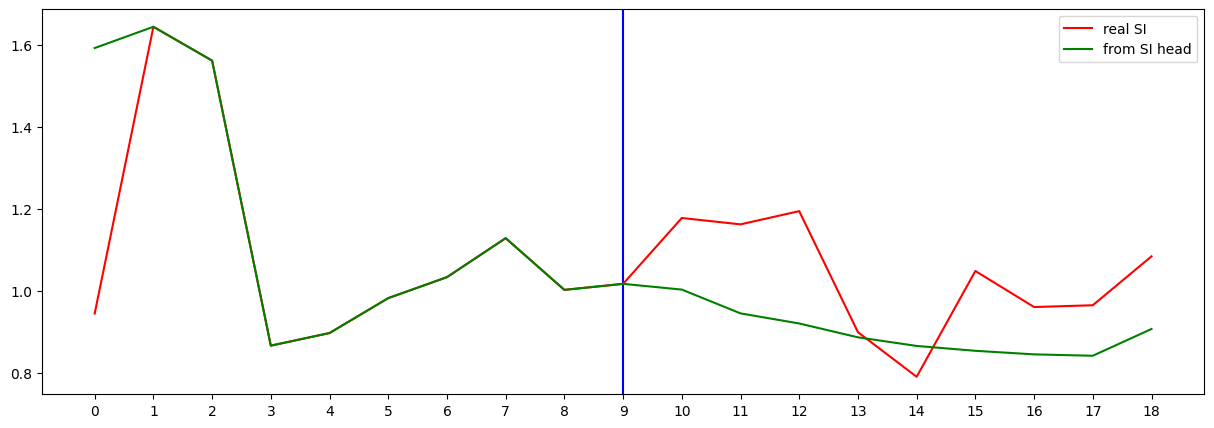

Testing R**2 - (all) - (no inputs):  0.8600190142495814
Testing R**2 - (f2) - SI full (no inputs):  -1.4075032334260702
Testing R**2 - SI head only (no inputs):  -0.6255864994971931
0 ...index R**2 (no inputs):  -0.348572550309727
1 ...index R**2 (no inputs):  -0.033753166120608524
2 ...index R**2 (no inputs):  -1.4075032334260702
3 ...index R**2 (no inputs):  -17.837599290894527
4 ...index R**2 (no inputs):  -636.1400794401156
5 ...index R**2 (no inputs):  -32.7746554810984
6 ...index R**2 (no inputs):  -1015.7490972722688
7 ...index R**2 (no inputs):  -36.02108913571371
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.5612732889207392
10 ...index R**2 (no inputs):  0.3122083971703272
11 ...index R**2 (no inputs):  -64.82229168634551
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -4.891460632085055
16 ...index R**2 (no inputs):  -0.2867050408792664
17 ...index R**2 (no inputs):  

In [43]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk000to400_train, 
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 5


In [44]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.913065
Loss_SI: 0.7874331474304199 Loss_all: 1.2062073945999146
===
[200] Train Loss: 0.107549
Loss_SI: 0.05412520468235016 Loss_all: 0.2322031706571579
===
[400] Train Loss: 0.055011
Loss_SI: 0.02217837981879711 Loss_all: 0.131620854139328
===
[600] Train Loss: 0.029585
Loss_SI: 0.01520552858710289 Loss_all: 0.06313662230968475
===
[800] Train Loss: 0.023905
Loss_SI: 0.012307417578995228 Loss_all: 0.050965696573257446
===


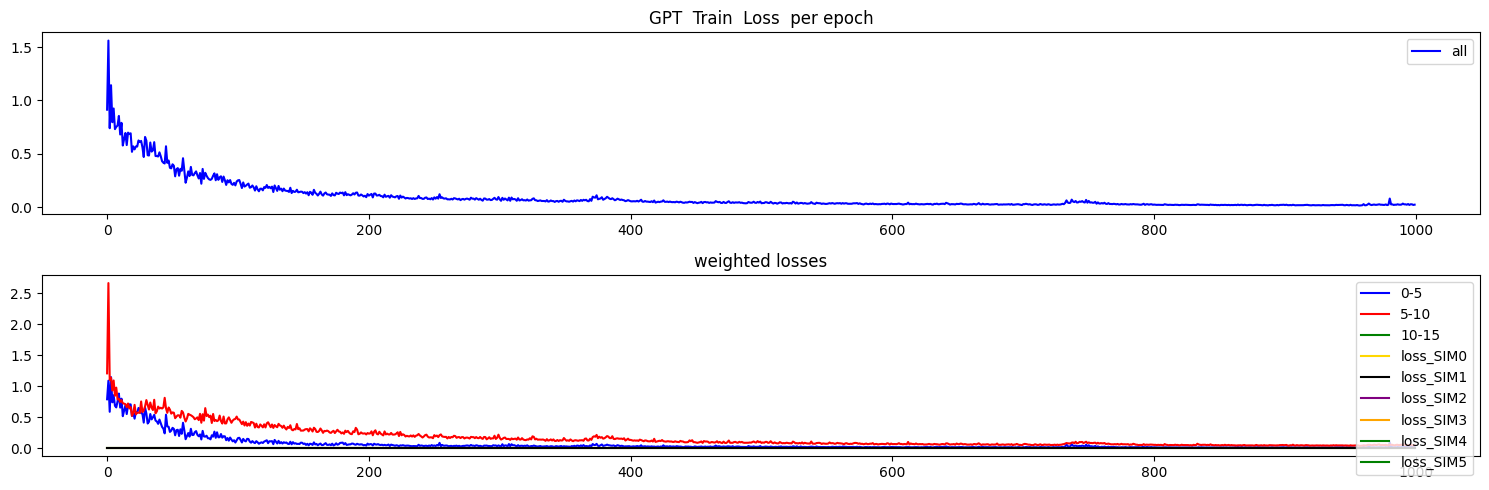

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


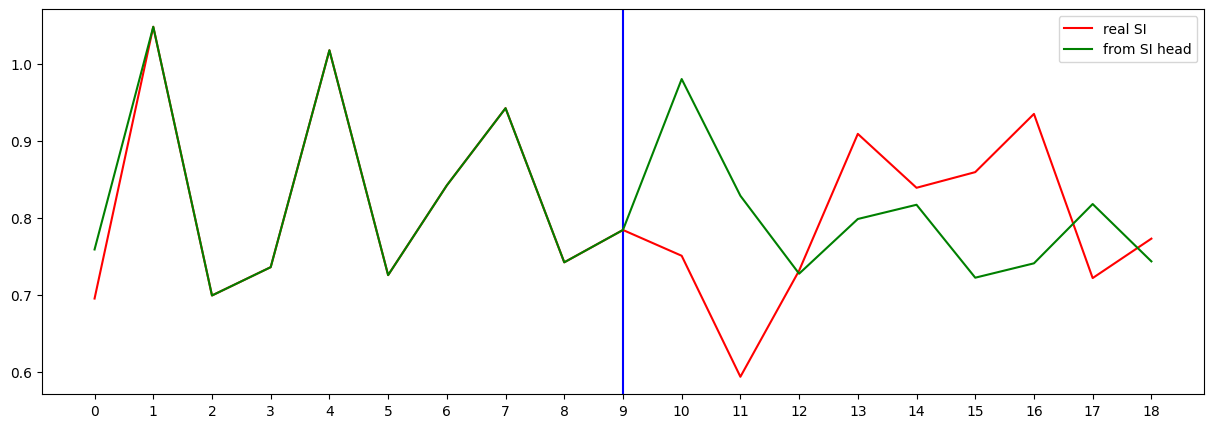

Testing R**2 - (all) - (no inputs):  0.9945752332228555
Testing R**2 - (f2) - SI full (no inputs):  -1.9452634164283369
Testing R**2 - SI head only (no inputs):  -1.5023436157070211
0 ...index R**2 (no inputs):  -2.4911491632338683
1 ...index R**2 (no inputs):  -0.3136725642074729
2 ...index R**2 (no inputs):  -1.9452634164283369
3 ...index R**2 (no inputs):  -57.78949992110093
4 ...index R**2 (no inputs):  -4.187145630509771
5 ...index R**2 (no inputs):  -0.010436212031340597
6 ...index R**2 (no inputs):  -0.43405377819010393
7 ...index R**2 (no inputs):  -0.395177744128818
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.46728223825202275
10 ...index R**2 (no inputs):  -0.21321385315890917
11 ...index R**2 (no inputs):  -36.13073222850954
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  0.15074328552711447
16 ...index R**2 (no inputs):  -0.6873740443202625
17 ...index R**2 (no inp

In [45]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk300to400_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 0.903068
Loss_SI: 0.7340840101242065 Loss_all: 1.29736328125
===
[200] Train Loss: 0.142774
Loss_SI: 0.09272052347660065 Loss_all: 0.25956395268440247
===
[400] Train Loss: 0.113046
Loss_SI: 0.057542406022548676 Loss_all: 0.24255488812923431
===
[600] Train Loss: 0.057389
Loss_SI: 0.02950447052717209 Loss_all: 0.12245446443557739
===
[800] Train Loss: 0.048896
Loss_SI: 0.018437519669532776 Loss_all: 0.11996547877788544
===


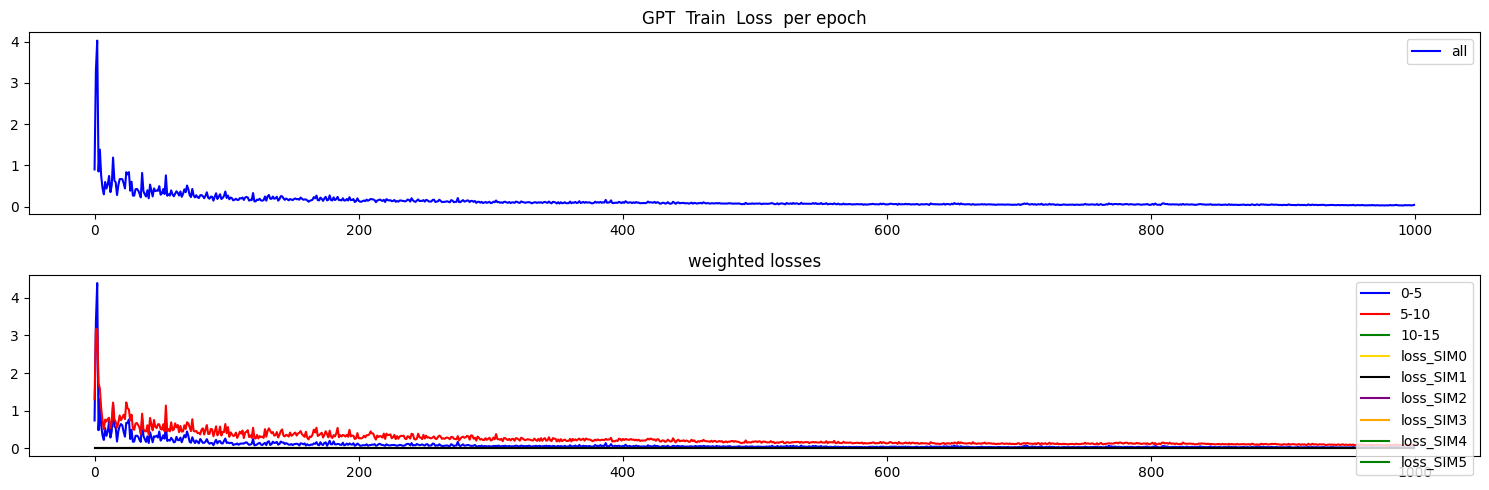

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


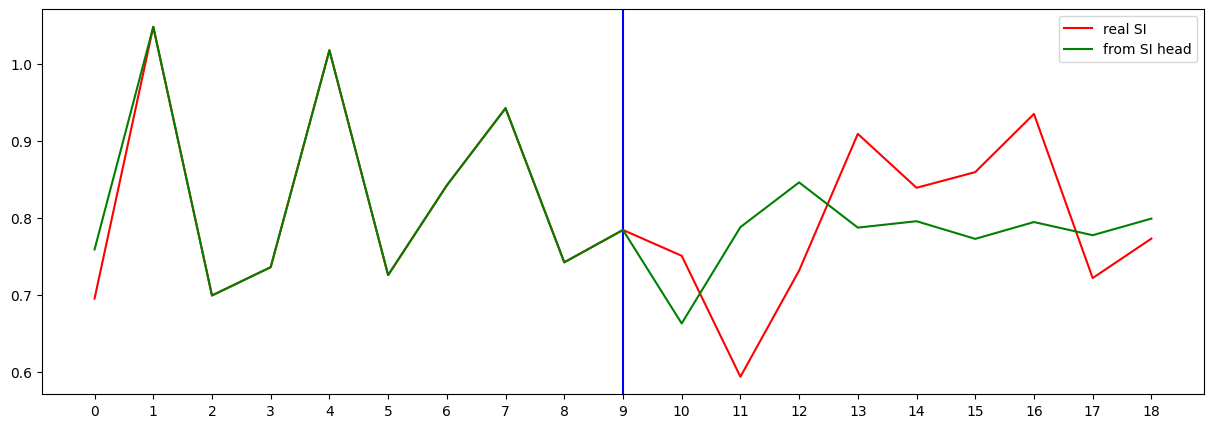

Testing R**2 - (all) - (no inputs):  0.9835931636230615
Testing R**2 - (f2) - SI full (no inputs):  0.32594883381162276
Testing R**2 - SI head only (no inputs):  0.3765265923680855
0 ...index R**2 (no inputs):  0.14893590758089692
1 ...index R**2 (no inputs):  0.4428379805978717
2 ...index R**2 (no inputs):  0.32594883381162276
3 ...index R**2 (no inputs):  -157.9185089322361
4 ...index R**2 (no inputs):  -10.82803687343733
5 ...index R**2 (no inputs):  -2.0653778913176577
6 ...index R**2 (no inputs):  -0.254767798109268
7 ...index R**2 (no inputs):  -0.9112470441742611
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.32781217807258667
10 ...index R**2 (no inputs):  -0.05585079416786676
11 ...index R**2 (no inputs):  -18.984676244866343
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.6417523257601594
16 ...index R**2 (no inputs):  -1.0787848714252104
17 ...index R**2 (no inputs)

In [46]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                chunk200to400_train, 
                                reasoning_steps=10,
                                backprop_through_steps=True 
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.745333
Loss_SI: 1.6777390241622925 Loss_all: 1.9030518531799316
===
[200] Train Loss: 0.219890
Loss_SI: 0.15210583806037903 Loss_all: 0.3780524432659149
===
[400] Train Loss: 0.114216
Loss_SI: 0.06955213844776154 Loss_all: 0.21843305230140686
===
[600] Train Loss: 0.097207
Loss_SI: 0.0524759441614151 Loss_all: 0.20158067345619202
===
[800] Train Loss: 0.064659
Loss_SI: 0.03507788106799126 Loss_all: 0.13368187844753265
===


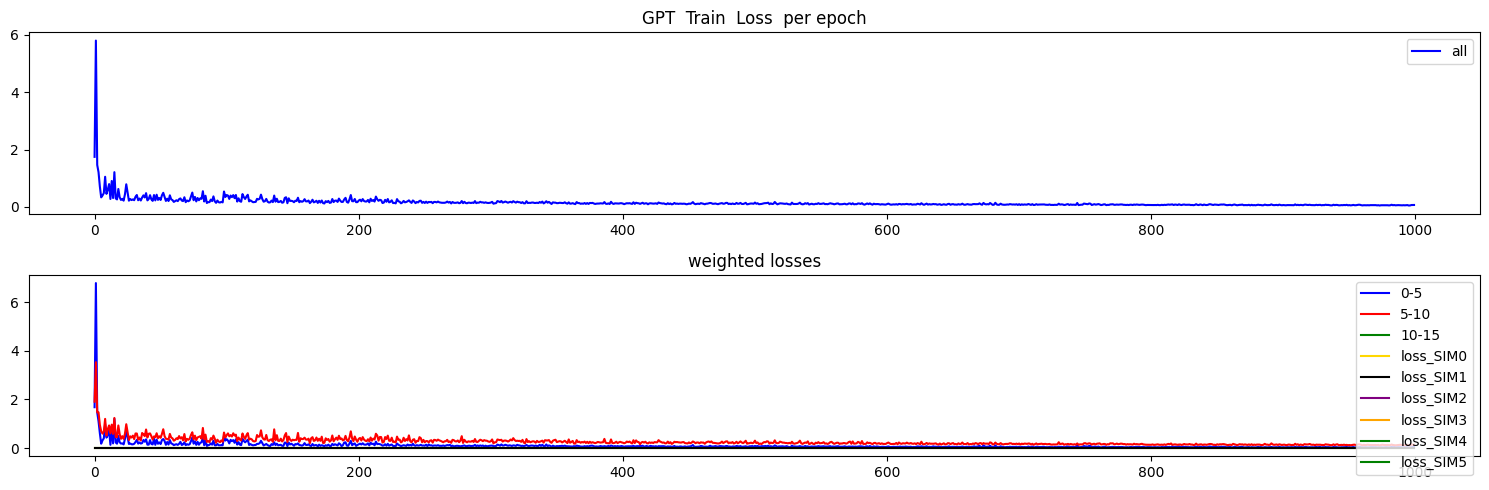

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


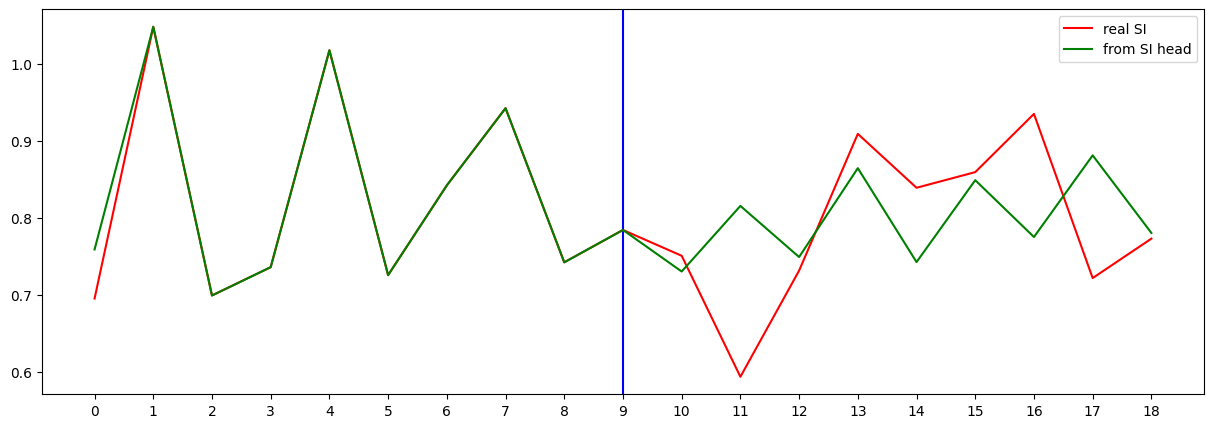

Testing R**2 - (all) - (no inputs):  0.9913887163448709
Testing R**2 - (f2) - SI full (no inputs):  -0.34799169235628225
Testing R**2 - SI head only (no inputs):  0.032679474492948835
0 ...index R**2 (no inputs):  -0.3209723799868214
1 ...index R**2 (no inputs):  -0.11625415775382031
2 ...index R**2 (no inputs):  -0.34799169235628225
3 ...index R**2 (no inputs):  -25.306040289482002
4 ...index R**2 (no inputs):  -25.027804620035308
5 ...index R**2 (no inputs):  -0.5913385680703891
6 ...index R**2 (no inputs):  -0.5708287540379162
7 ...index R**2 (no inputs):  -8.627422690713878
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.20997677314904784
10 ...index R**2 (no inputs):  -0.9966989111846518
11 ...index R**2 (no inputs):  -24.19826364986728
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.25972256661603477
16 ...index R**2 (no inputs):  -0.844415285602309
17 ...index R**2 (no i

In [47]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk100to400_train, 
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 0.655001
Loss_SI: 0.44885003566741943 Loss_all: 1.1360194683074951
===
[200] Train Loss: 0.228444
Loss_SI: 0.18625234067440033 Loss_all: 0.326890766620636
===
[400] Train Loss: 0.215007
Loss_SI: 0.11386889219284058 Loss_all: 0.45099660754203796
===
[600] Train Loss: 0.141784
Loss_SI: 0.09124743193387985 Loss_all: 0.2597028911113739
===
[800] Train Loss: 0.095640
Loss_SI: 0.05036742985248566 Loss_all: 0.20127615332603455
===


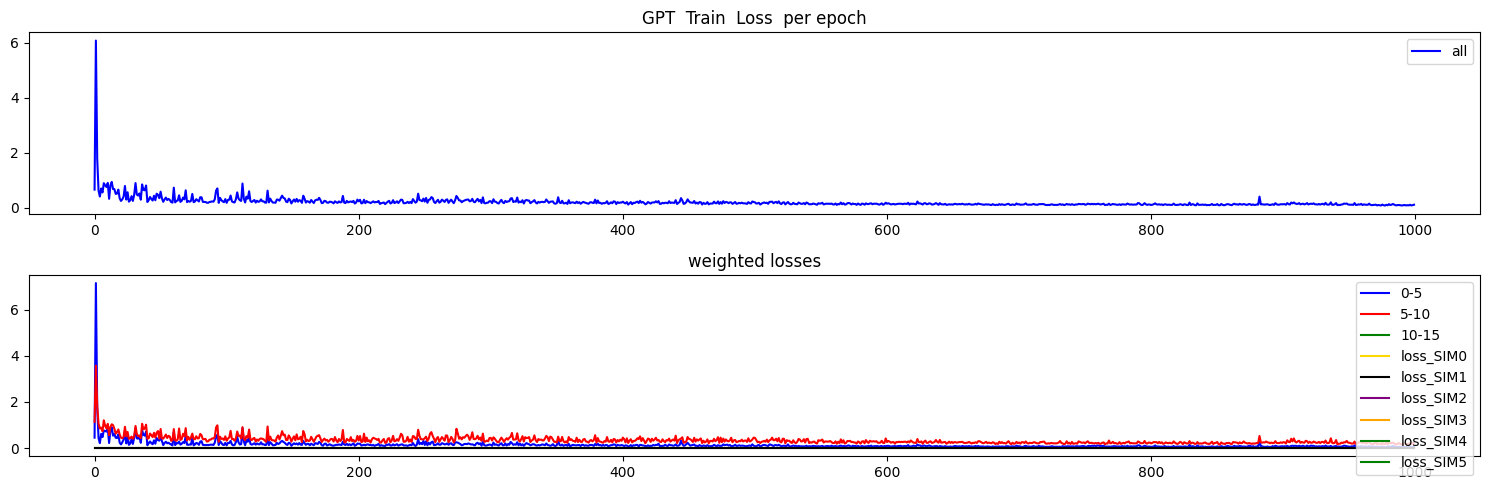

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


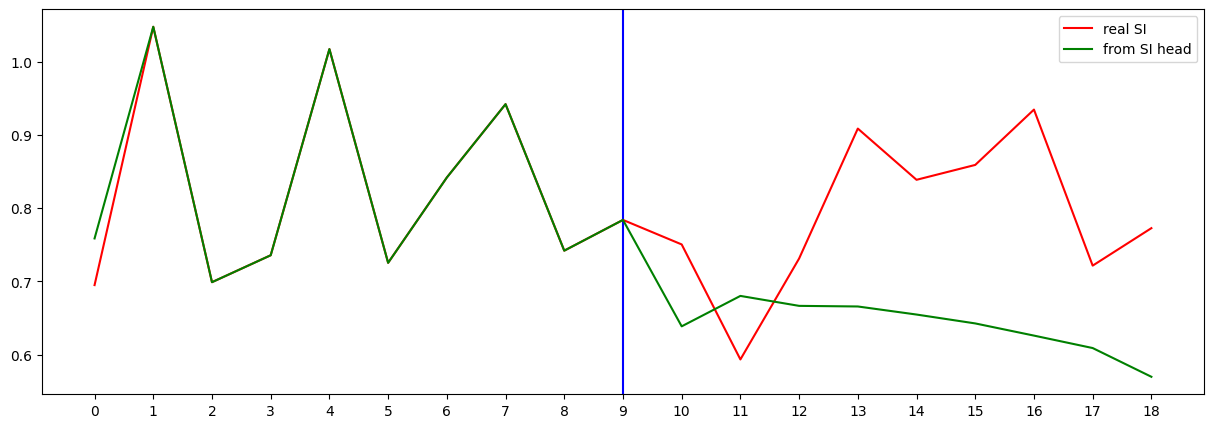

Testing R**2 - (all) - (no inputs):  0.9715309187466087
Testing R**2 - (f2) - SI full (no inputs):  -6.388529971182913
Testing R**2 - SI head only (no inputs):  -1.7756580257212167
0 ...index R**2 (no inputs):  0.01891372203042152
1 ...index R**2 (no inputs):  -1.3483532627167052
2 ...index R**2 (no inputs):  -6.388529971182913
3 ...index R**2 (no inputs):  -129.23192790801806
4 ...index R**2 (no inputs):  -32.639173849399654
5 ...index R**2 (no inputs):  -3.2568169559185174
6 ...index R**2 (no inputs):  -0.13560535833383458
7 ...index R**2 (no inputs):  -7.309200210158867
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.07346076513427535
10 ...index R**2 (no inputs):  -0.025264015297357112
11 ...index R**2 (no inputs):  -9.804403193440733
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.0937241093182033
16 ...index R**2 (no inputs):  -0.3973822762715147
17 ...index R**2 (no inpu

In [48]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to400_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## R2 over accumulated Runs


In [49]:

from sklearn.metrics import r2_score


real_si_concat_300to400 = np.concatenate(all_real_si_300to400)
pred_si_concat_300to400 = np.concatenate(all_pred_si_300to400)

real_si_concat_200to400 = np.concatenate(all_real_si_200to400)
pred_si_concat_200to400 = np.concatenate(all_pred_si_200to400)

real_si_concat_100to400 = np.concatenate(all_real_si_100to400)
pred_si_concat_100to400 = np.concatenate(all_pred_si_100to400)

real_si_concat_000to400 = np.concatenate(all_real_si_000to400)
pred_si_concat_000to400 = np.concatenate(all_pred_si_000to400)


In [50]:


r2 = r2_score(real_si_concat_300to400, pred_si_concat_300to400 )

print("Accumulated R² 300to400:", r2)


Accumulated R² 300to400: -0.041195106964042605


In [51]:

r2 = r2_score(real_si_concat_200to400, pred_si_concat_200to400 )

print("Accumulated R² 200to400:", r2)


Accumulated R² 200to400: 0.2657949057951622


In [52]:

r2 = r2_score(real_si_concat_100to400, pred_si_concat_100to400 )

print("Accumulated R² 100to400:", r2)


Accumulated R² 100to400: 0.13113290385933696


In [53]:

r2 = r2_score(real_si_concat_000to400, pred_si_concat_000to400 )

print("Accumulated R² 000to400:", r2)


Accumulated R² 000to400: 0.009376597488696792



## First Few R2


In [54]:

from sklearn.metrics import r2_score
import numpy as np


def print_first_few_R2( real_si_concat, pred_si_concat, THE_FIRST_FEW ):

    first_n = THE_FIRST_FEW

    real = np.array( real_si_concat  )
    pred = np.array( pred_si_concat  )

    real_first4 = []
    pred_first4 = []

    for i in range(0, len(real), 9):
        real_first4.extend(real[i:i+first_n])
        pred_first4.extend(pred[i:i+first_n])

    # Convert to numpy arrays
    real_first4 = np.array(real_first4)
    pred_first4 = np.array(pred_first4)

    # Compute R²
    r2_first4 = r2_score(real_first4, pred_first4)
    print(THE_FIRST_FEW, ".....R² on first n steps:", r2_first4)


In [55]:

print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 1 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 2 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 3 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 4 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 5 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 6 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 7 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 8 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 9 )


1 .....R² on first n steps: 0.3285893662808851
2 .....R² on first n steps: -0.0009876425619630425
3 .....R² on first n steps: 0.14438911747959815
4 .....R² on first n steps: 0.05816744011422148
5 .....R² on first n steps: -0.017067095258882947
6 .....R² on first n steps: -0.18595263049630906
7 .....R² on first n steps: -0.1294399001185429
8 .....R² on first n steps: -0.09032162768142138
9 .....R² on first n steps: -0.041195106964042605


In [56]:

print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 1 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 2 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 3 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 4 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 5 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 6 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 7 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 8 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 9 )


1 .....R² on first n steps: 0.7449024998426648
2 .....R² on first n steps: 0.5391337211825464
3 .....R² on first n steps: 0.5103657678379077
4 .....R² on first n steps: 0.5273648640541255
5 .....R² on first n steps: 0.35943999228996293
6 .....R² on first n steps: 0.18647344165424762
7 .....R² on first n steps: 0.16906090270935326
8 .....R² on first n steps: 0.2114565227522187
9 .....R² on first n steps: 0.2657949057951622


In [57]:

print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 1 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 2 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 3 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 4 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 5 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 6 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 7 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 8 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 9 )



1 .....R² on first n steps: 0.7849401735627707
2 .....R² on first n steps: 0.612530389936906
3 .....R² on first n steps: 0.518333734783933
4 .....R² on first n steps: 0.32103218378433385
5 .....R² on first n steps: 0.20519046348239356
6 .....R² on first n steps: 0.12152729474175372
7 .....R² on first n steps: 0.14306341236127107
8 .....R² on first n steps: 0.1432984863981731
9 .....R² on first n steps: 0.13113290385933696


In [58]:

print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 1 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 2 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 3 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 4 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 5 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 6 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 7 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 8 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 9 )


1 .....R² on first n steps: 0.7619935638085578
2 .....R² on first n steps: 0.5095775108746281
3 .....R² on first n steps: 0.287240840884744
4 .....R² on first n steps: 0.21881640203181896
5 .....R² on first n steps: 0.09379005875054447
6 .....R² on first n steps: 0.0108703604257544
7 .....R² on first n steps: 0.029056226962055565
8 .....R² on first n steps: -0.006936131194875683
9 .....R² on first n steps: 0.009376597488696792



## Plot


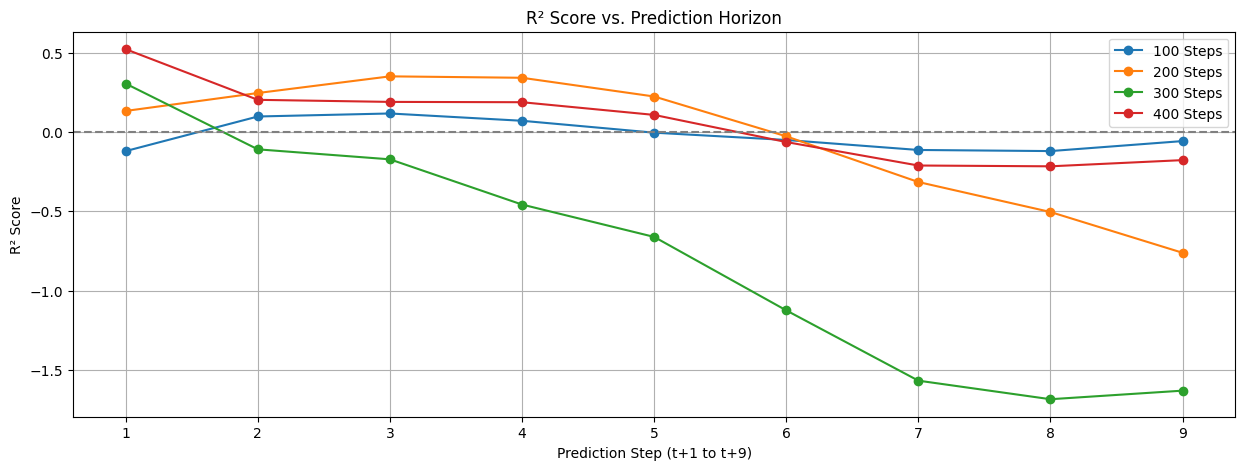

In [59]:

import matplotlib.pyplot as plt

def plot_r2_curves():
    steps = list(range(1, 10))

    r2_100 = [-0.121, 0.097, 0.116, 0.070, -0.005, -0.051, -0.114, -0.121, -0.058]
    r2_200 = [0.132, 0.245, 0.350, 0.341, 0.223, -0.028, -0.316, -0.505, -0.762]
    r2_300 = [0.304, -0.110, -0.173, -0.458, -0.662, -1.125, -1.568, -1.685, -1.631]
    r2_400 = [0.521, 0.202, 0.189, 0.187, 0.107, -0.064, -0.212, -0.217, -0.178]

    plt.plot(steps, r2_100, marker='o', label='100 Steps')
    plt.plot(steps, r2_200, marker='o', label='200 Steps')
    plt.plot(steps, r2_300, marker='o', label='300 Steps')
    plt.plot(steps, r2_400, marker='o', label='400 Steps')

    plt.title("R² Score vs. Prediction Horizon")
    plt.xlabel("Prediction Step (t+1 to t+9)")
    plt.ylabel("R² Score")
    plt.legend()
    plt.grid(True)
    plt.axhline(0, color='gray', linestyle='--')
    plt.show()


plot_r2_curves()
    
